## Title

### Objective

## Table of Contents

- [Data Analysis Project](#data-analysis-project)
  - [Table of Contents](#table-of-contents)
  - [Data Preprocessing](#data-preprocessing)
    - [Data Loading](#data-loading)
    - [Data Inspection](#data-inspection)
    - [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
      - [Data Cleaning](#data-cleaning)
          -[Handling Missing Data and Structural Errors](handling-missing-data-and-structural-errors)
          -[Other Colums cleanup](other-colums-cleanup)
  - [Feature Engineering and Transformation](#feature-engineering-and-transformation)
    - [Discretization](#discretization)
    - [Categorical Encoding](#categorical-encoding)
    - [Variable Transformation](#variable-transformation)
    - [Scaling](#scaling)
    - [Dimensionality Reduction](#dimensionality-reduction)
  - [Model Implementation](#model-implementation)
    - [Supervised Learning](#supervised-learning)
    - [Model Evaluation](#model-evaluation)
  - [Model Optimization](#model-optimization)
    - [Hyperparameter Tuning](#hyperparameter-tuning)
    - [Regularization](#regularization)
    - [Visualizations](#visualizations)
  - [Presentation](#presentation)
    - [Clear Objectives](#clear-objectives)
    - [Model Performance](#model-performance)
    - [Interactivity (Optional)](#interactivity-optional)

---

### Import Dependencies

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
%matplotlib inline
import seaborn as sns
from scipy.stats import skew, norm
from sklearn.metrics import confusion_matrix, classification_report

---

## Data Preprocessing

### Data Loading
- Load the `Leads.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df_leads = pd.read_csv("Resources/Leads.csv")

# Review the DataFrame
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Inspection
- Handle missing values, column types, and summary statistics.

In [3]:
#checking total rows and cols in dataset
df_leads.shape

(9240, 37)

The Leads.csv has 9,240 rows and 37 columns

In [4]:
#data check
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Exploratory Data Analysis (EDA)
### Feature Eng.

Will keep the index number from the original Dataset, and will be removing or transforming data, analyzing one by one


In [6]:
for i, col in enumerate(df_leads.columns):
    print(f"{i} - {col}")

0 - Prospect ID
1 - Lead Number
2 - Lead Origin
3 - Lead Source
4 - Do Not Email
5 - Do Not Call
6 - Converted
7 - TotalVisits
8 - Total Time Spent on Website
9 - Page Views Per Visit
10 - Last Activity
11 - Country
12 - Specialization
13 - How did you hear about X Education
14 - What is your current occupation
15 - What matters most to you in choosing a course
16 - Search
17 - Magazine
18 - Newspaper Article
19 - X Education Forums
20 - Newspaper
21 - Digital Advertisement
22 - Through Recommendations
23 - Receive More Updates About Our Courses
24 - Tags
25 - Lead Quality
26 - Update me on Supply Chain Content
27 - Get updates on DM Content
28 - Lead Profile
29 - City
30 - Asymmetrique Activity Index
31 - Asymmetrique Profile Index
32 - Asymmetrique Activity Score
33 - Asymmetrique Profile Score
34 - I agree to pay the amount through cheque
35 - A free copy of Mastering The Interview
36 - Last Notable Activity


In [7]:
print(df_leads.columns)

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


Reviewing if the 0 - Prospect ID and 1 - Lead Number columns have any duplicates

In [8]:
# Check for duplicate values in the "Lead Number" column
duplicate_count_LN = df_leads["Lead Number"].duplicated().sum()
print(f"Number of duplicate 'Lead Number' entries: {duplicate_count_LN}")

# Check for duplicate values in the "Lead Number" column
duplicate_count_PID = df_leads["Prospect ID"].duplicated().sum()
print(f"Number of duplicate 'Prospect ID' entries: {duplicate_count_PID}")

Number of duplicate 'Lead Number' entries: 0
Number of duplicate 'Prospect ID' entries: 0


0 - Prospect ID and 1 - Lead Number are unique identification numbers, they not relevent to this analysis, so they will be dropped. 

In [9]:
#dropping Lead Number columns 
df_leads.drop(["Lead Number","Prospect ID"], axis=1, inplace = True)
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Fixing "Select" values, changing them to NaN, this is due to the fact that user did not select any value from the options

In [10]:
# Converting 'Select' values to NaN.
df_leads = df_leads.replace('Select', np.nan)

Changing all columns to lower case

In [11]:
# changing  all columns values to lower case
for col in df_leads.columns:
    df_leads[col] = df_leads[col].apply(lambda s: s.lower() if type(s)==str else s)

In [12]:
#data check
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [13]:
#Review null values per column
df_leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [14]:
# Calculate the percentage of null values for each column
null_percentage = (df_leads.isnull().sum() / len(df_leads)* 100) .round(2)

# Display the percentage of null values per column
print(null_percentage)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

###  ---- !!!fix all to 55%

###### Drop columns with more than 55% missing data

In [15]:
cols = df_leads.columns

for i in cols:
    if (100 * (df_leads[i].isnull().sum() / len(df_leads.index))) >= 55:
        df_leads.drop(i, axis=1, inplace=True)

# Check the updated DataFrame
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

###### Removed columns with more than 55% null content:

Reduced from 37 to 33 columns from previous cleanups, but not done yet, as some columns might contain important information, will analyze each.
Removed columns with more than 45% null content:</br>
11 - Country </br>
13 - How did you hear about X Education </br>
28 - Lead Profile </br>



In [16]:
#data check
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

##### 2 - Lead Origin

In [17]:
#Lead Origin
df_leads['Lead Origin'].value_counts(dropna=False)

Lead Origin
landing page submission    4886
api                        3580
lead add form               718
lead import                  55
quick add form                1
Name: count, dtype: int64

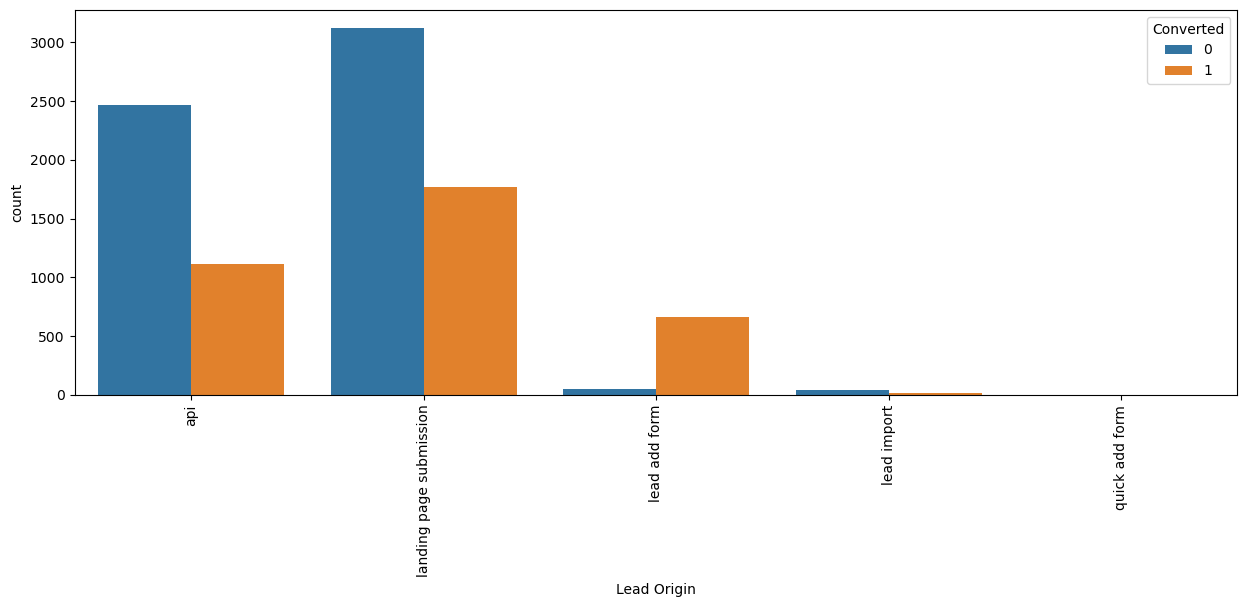

In [18]:
#visualizing the spread of the variable 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Lead Origin', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

Feature Eng. to apply: category aggregation to reduce the number of columns for #One-Hot Encoding

In [19]:
# Aggregating less frequent categories into "Others"
df_leads['Lead Origin'] = df_leads['Lead Origin'].replace(['lead add form', 'lead import', 'quick add form'], 'Others')

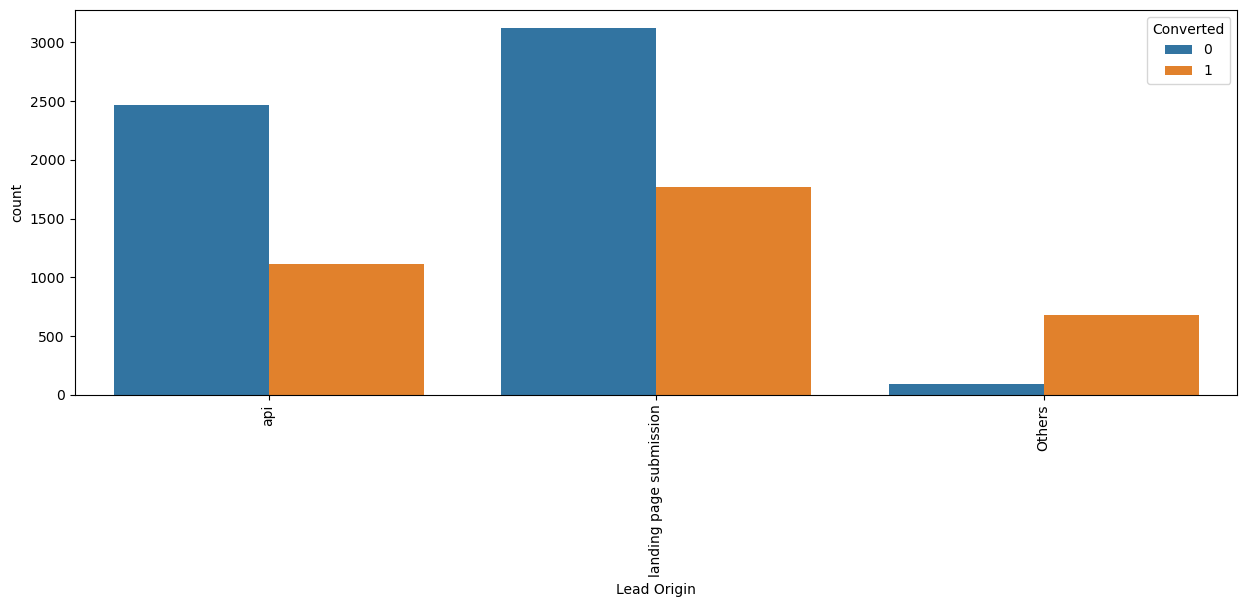

In [20]:
#visualizing the spread of the variable 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Lead Origin', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

API and Landing Page Submission bring higher number of leads as well as conversion.
Lead Add Form has a very high conversion rate but count of leads are not very high.
Lead Import and Quick Add Form get very few leads.
In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

"Landing Page Submission" and "API" are the primary sources of leads, with Landing Page Submission being slightly more effective in terms of conversion rate.
"Lead Add Form" appears to be more efficient, with a higher proportion of leads converting, despite its lower volume.
Improving the conversion rate of leads from "API" could be a focus, as it has a high number of non-converting leads.

Predictive Power:

The chart shows that different lead origins have different conversion rates. For instance, "Lead Add Form" has a higher conversion rate compared to "API." This indicates that the origin of a lead can provide insight into how likely that lead is to convert, which is valuable information for predicting conversions.
Categorical Impact:

"Lead Origin" is a categorical feature that indicates the source of the lead, which can have a significant influence on conversion behavior. If certain origins are consistently associated with high or low conversions, this column will help the model differentiate between high-quality and low-quality leads.
Feature Encoding:

You can encode "Lead Origin" using techniques like one-hot encoding to allow the model to use this information effectively. The resulting features can then be used by the machine learning model to identify the importance of each lead origin in predicting conversion.
Correlation:

Even if the correlation between "Lead Origin" and the target variable (conversion) isn't very high, categorical features often provide non-linear relationships that machine learning models (especially tree-based models like Random Forest or Gradient Boosting) can capture effectively.
Based on this analysis, I would suggest keeping the "Lead Origin" column in the model. It appears to provide information that could be useful in predicting whether a lead will convert or not. If during feature selection or feature importance analysis it turns out to be less important, it can be dropped, but it is worthwhile to include it initially.

02 - Lead Origin Keep

##### 3 - Lead Source 

In [21]:
#checking for mode value
df_leads['Lead Source'].value_counts()

Lead Source
google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: count, dtype: int64

EDA - Data cleaning and Standarization

In [22]:

# Standardize category names to lowercase
df_leads['Lead Source'] = df_leads['Lead Source'].str.lower()

# Replace variations with consistent names
df_leads['Lead Source'] = df_leads['Lead Source'].replace({'facebook': 'social media'})
df_leads['Lead Source'] = df_leads['Lead Source'].replace({'youtube': 'social media'})

# Remove rows where 'Lead Source' has irrelevant or test values
df_leads = df_leads[~df_leads['Lead Source'].isin(['testone'])]

# Replace synonyms with a consistent value
df_leads['Lead Source'] = df_leads['Lead Source'].replace({'welearnblog_home': 'welearn', 'WeLearn': 'welearn'})


# Recheck the value counts
print(df_leads['Lead Source'].value_counts())


Lead Source
google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
social media           57
bing                    6
click2call              4
press_release           2
welearn                 2
live chat               2
youtubechannel          1
blog                    1
pay per click ads       1
nc_edm                  1
Name: count, dtype: int64


Feature Engineering - Binning- Remove options with  values under 50 to reduce the amount of columns during OHE

In [23]:
# Define a cutoff value
cutoff_value = 200

# Create a list of lead sources to be replaced with 'Other'
lead_sources_to_replace = df_leads['Lead Source'].value_counts()[df_leads['Lead Source'].value_counts() < cutoff_value].index.tolist()

# Replace the infrequent lead sources with 'Other'
df_leads['Lead Source'] = df_leads['Lead Source'].apply(lambda x: 'Other' if x in lead_sources_to_replace else x)

# Check the updated value counts
print(df_leads['Lead Source'].value_counts())

Lead Source
google            2873
direct traffic    2543
olark chat        1755
organic search    1154
reference          534
Other              344
Name: count, dtype: int64


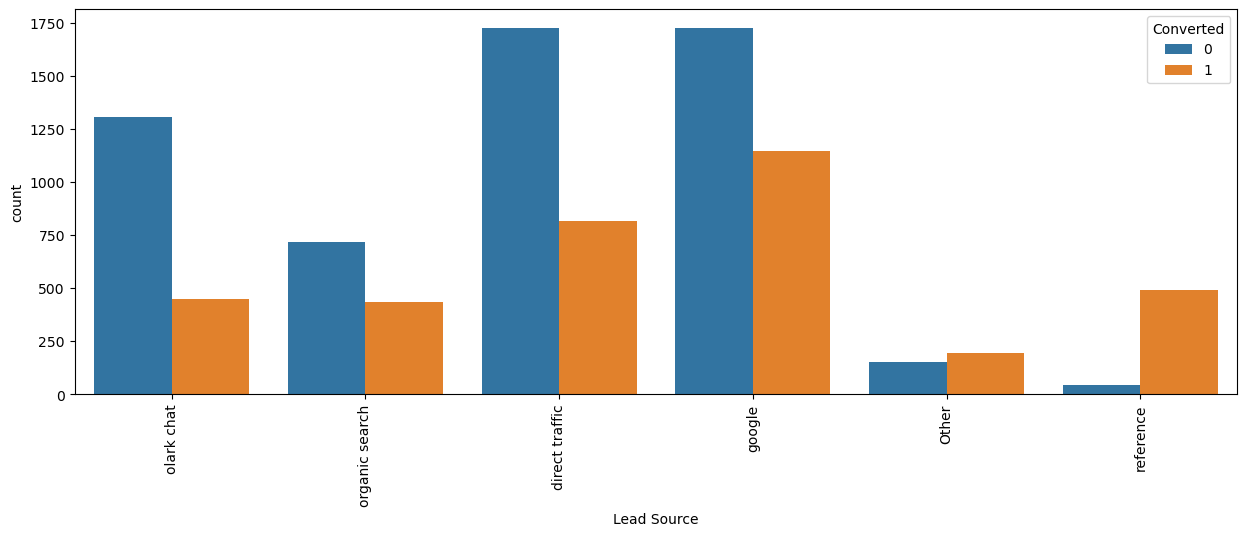

In [24]:
#visualizing the spread of the variable 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Lead Source', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()




Different lead sources show varied conversion rates, indicating that the source has an impact on the likelihood of conversion. For instance, references and Google have higher conversion rates compared to direct traffic.


"Lead Source" can help the model capture important distinctions between different types of leads. For example, leads from referrals or specific websites may be of higher quality, and the model can use this information to predict conversion more accurately.


If certain lead sources, like "Direct Traffic," have a low conversion rate, this information can be used for business insights as well, enabling targeted marketing strategies to improve conversion.
To include "Lead Source" in a machine learning model, you would need to encode it properly, such as using one-hot encoding, which allows the model to recognize different sources and learn from their distinct behaviors.

Including "Lead Source" will likely improve the model's performance, as it provides essential context regarding lead quality and conversion likelihood.

3- Lead Sources  - Keep 


#### 4 - Do Not Email & 5 - Do Not Call

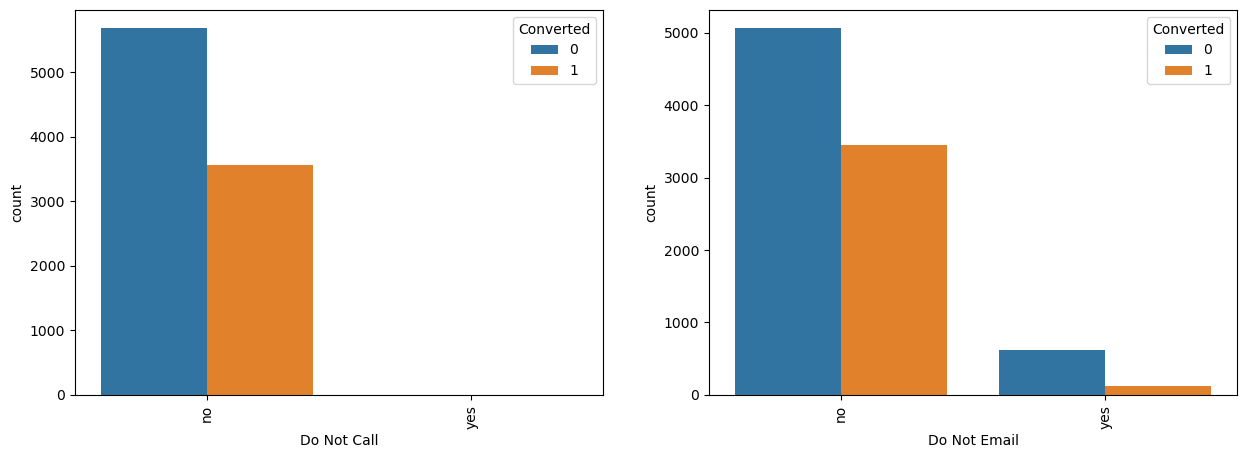

In [25]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15, 5))

# Plotting 'Do Not Call' with 'Converted' as hue
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='Do Not Call', hue='Converted', data=df_leads, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Plotting 'Do Not Email' with 'Converted' as hue
ax2 = plt.subplot(1, 2, 2)
sns.countplot(x='Do Not Email', hue='Converted', data=df_leads, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

plt.show()

Feature Eng. - Binary Encoding </br>
Since both features are binary ("yes" or "no"), converting them into numerical values 0 and 1 will be useful for the model.

In [26]:
df_leads['Do Not Call'] = df_leads['Do Not Call'].map({'no': 0, 'yes': 1})
df_leads['Do Not Email'] = df_leads['Do Not Email'].map({'no': 0, 'yes': 1})

The "Do Not Email" feature seems to have a stronger effect on conversion compared to "Do Not Call", suggesting that restricting email communication negatively affects conversion rates.
I beleive that the double negation is misleading, and most people rather not getting contact.
Leads that do not want to be contacted (either by call or email) may be less likely to convert, and including this information helps the model understand this behavior
As both charts have a significant amount of convertions, we will keep these columns

4 - Do Not Email - Keep </br>
5 - Do Not Call - Keep

##### 6 - <b> Converted is the dependent variable (y), the one we are trying to achieve, we want to increase the number or 1's (conversions) <b>  

6 - Converted - Keep

##### 7 - Total Visits

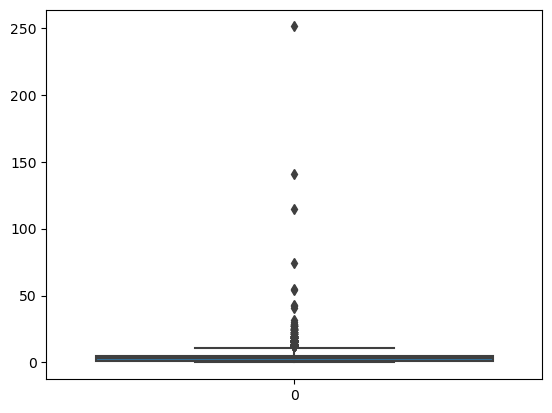

In [27]:
#Total Visits
#visualizing spread of variable

sns.boxplot(df_leads['TotalVisits'])
plt.show()


EDA -There are outliers in the data, cap the outliers to 95%for analysis, to better understand the dataset and visualize trends without the influence of extreme values

In [28]:
#checking percentile values for "Total Visits"

df_leads['TotalVisits'].describe(percentiles=[.05,.25, .5, .75,.95, .99])

count    9102.000000
mean        3.445067
std         4.855092
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

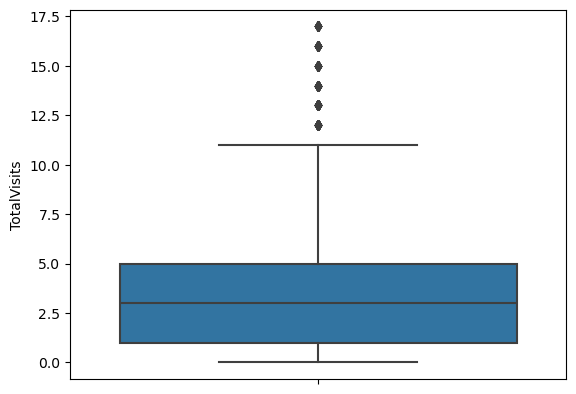

In [29]:
#Outlier Treatment (EDA): Remove top & bottom 5% of the Column Outlier values

Q3 = df_leads.TotalVisits.quantile(0.99)
df_leads = df_leads[(df_leads.TotalVisits <= Q3)]
Q1 = df_leads.TotalVisits.quantile(0.01)
df_leads = df_leads[(df_leads.TotalVisits >= Q1)]
sns.boxplot(y=df_leads['TotalVisits'])
plt.show()

<Axes: xlabel='Converted', ylabel='TotalVisits'>

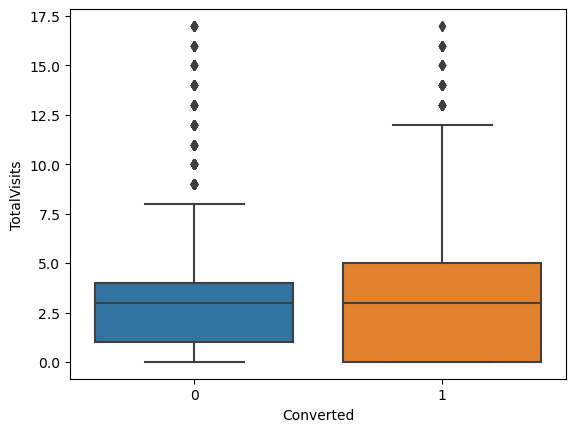

In [30]:

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)

wever, the upper quartile (75th percentile) is higher for converted leads, indicating that leads that convert tend to have a higher number of total visits compared to those that do not convert.

c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


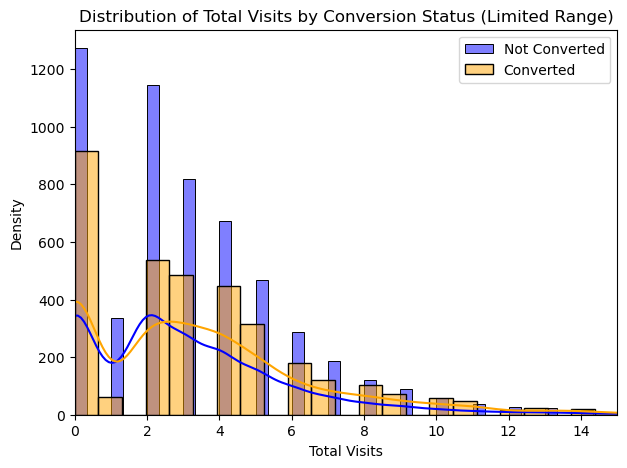

In [31]:
# Plotting the distribution of Total Visits split by Converted and Not Converted with x-axis limit
plt.figure(figsize=(7, 5))

# Plotting histogram and density for Not Converted
sns.histplot(df_leads[df_leads['Converted'] == 0]['TotalVisits'], kde=True, color='blue', label='Not Converted', alpha=0.5)

# Plotting histogram and density for Converted
sns.histplot(df_leads[df_leads['Converted'] == 1]['TotalVisits'], kde=True, color='orange', label='Converted', alpha=0.5)

# Adding title and labels
plt.title('Distribution of Total Visits by Conversion Status (Limited Range)')
plt.xlabel('Total Visits')
plt.ylabel('Density')
plt.xlim(0, 15)  # Limiting the x-axis to 0-15 for better visualization
plt.legend()

plt.show()

c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


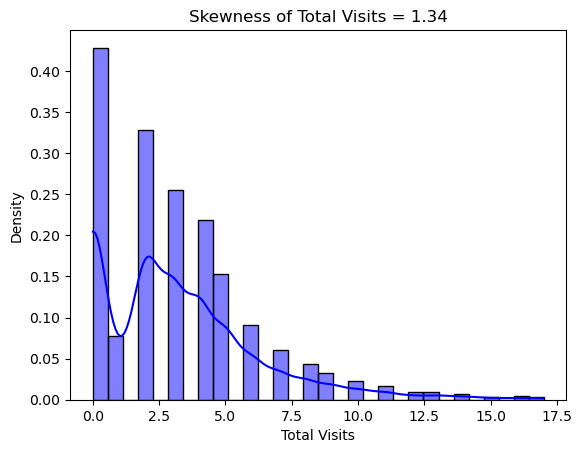

In [32]:
# Calculate skewness
skewness = skew(df_leads['TotalVisits'])
skewness_rounded = round(skewness, 2)

# Plotting the distribution
sns.histplot(df_leads['TotalVisits'], kde=True,  color='blue', stat="density", bins=30)
plt.title(f"Skewness of Total Visits = {skewness_rounded}")
plt.xlabel('Total Visits')
plt.ylabel('Density')
plt.show()

The distribution is heavily skewed to the left, with the highest peak around 0-2 visits.
The overall pattern shows that many leads that do not convert tend to have fewer visits.
However, compared to non-converted leads, a higher number of converted leads continue to visit beyond 3 times.
he density for converted leads is higher at 4-6 visits compared to non-converted, indicating that more visits are generally associated with a higher likelihood of conversion.

7 - Total Visits - Keep

##### 8 - Total Time Spent on Website

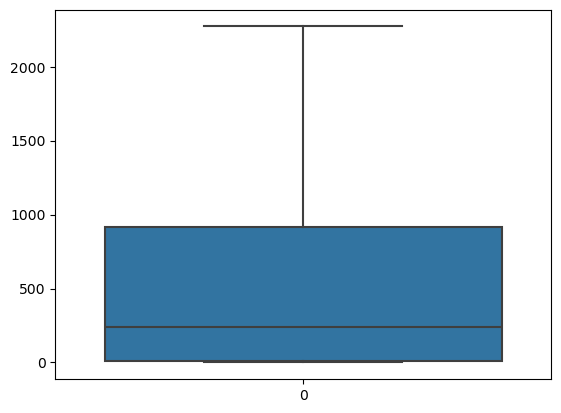

In [33]:

#visualizing boxplot 

sns.boxplot(df_leads['Total Time Spent on Website'])
plt.show()

There is a single point plotted above the upper whisker, which indicates an outlier in the dataset.
The data appears to be right-skewed, with some leads having values far greater than most other leads.

c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


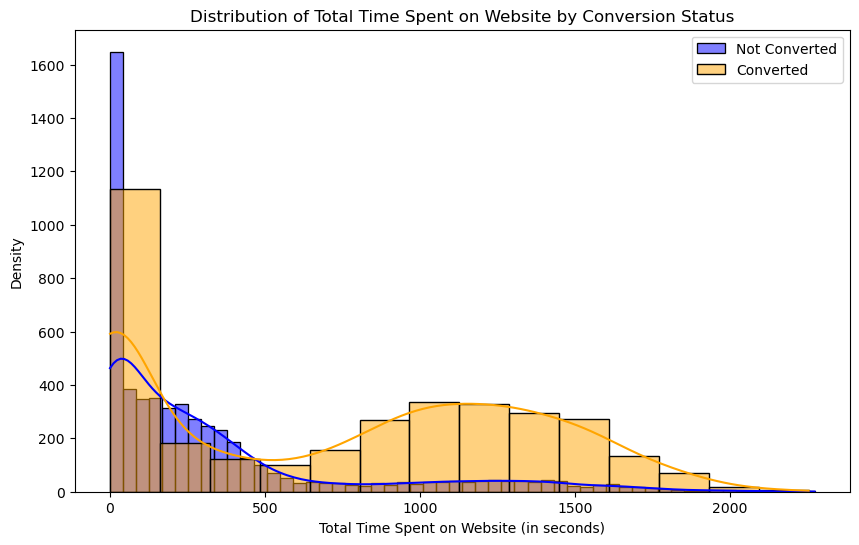

In [34]:
# Plotting the distribution of "Total Time Spent on Website" split by Converted and Not Converted
plt.figure(figsize=(10, 6))

# Plotting histogram and density for Not Converted
sns.histplot(df_leads[df_leads['Converted'] == 0]['Total Time Spent on Website'], kde=True, color='blue', label='Not Converted', alpha=0.5)

# Plotting histogram and density for Converted
sns.histplot(df_leads[df_leads['Converted'] == 1]['Total Time Spent on Website'], kde=True, color='orange', label='Converted', alpha=0.5)

# Adding title and labels
plt.title('Distribution of Total Time Spent on Website by Conversion Status')
plt.xlabel('Total Time Spent on Website (in seconds)')
plt.ylabel('Density')
plt.legend()

plt.show()

Feat Eng. , will reduce skewness and also capture a simplified representation of the feature for the model to learn better.

In [35]:
# Define the bin edges and labels
bin_edges = [0, 500, 1500, df_leads['Total Time Spent on Website'].max()]
bin_labels = ['Low', 'Medium', 'High']

# Create a new column with the binned values
df_leads['Time_Spent_Binned'] = pd.cut(df_leads['Total Time Spent on Website'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Display the value counts for each bin
print(df_leads['Time_Spent_Binned'].value_counts())

Time_Spent_Binned
Low       5980
Medium    2475
High       564
Name: count, dtype: int64


uggesting that those who converted generally spent more time on the website compared to those who did not convert.
-converted leads are heavily skewed to the left, with the highest density at very short times spent.
Non-converted leads are heavily skewed to the left, with the highest density at very short times spent.
Converted leads tend to spend more time on the website, as indicated by the higher density in the mid-range (500-1500 seconds).


8 -  Total Time Spent on Website - Keep

##### 9 - Page Views Per Visit

In [36]:
#checking for mode value
df_leads['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00    2189
2.00    1792
3.00    1193
4.00     893
1.00     651
        ... 
1.31       1
2.13       1
2.14       1
1.63       1
1.17       1
Name: count, Length: 73, dtype: int64

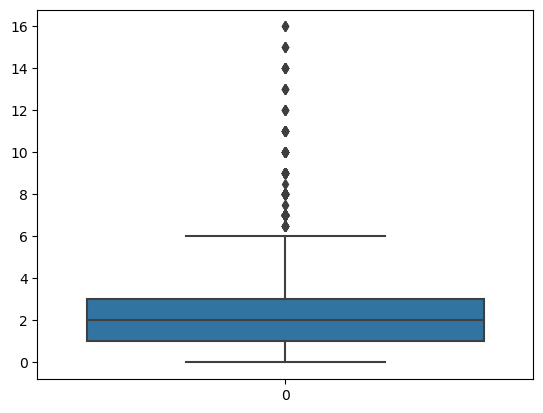

In [37]:
#visualizing boxplot 
sns.boxplot(df_leads['Page Views Per Visit'])
plt.show()

The IQR (from 1 to 4) indicates that the spread of most of the data is relatively narrow, with many values clustering between 1 and 4.
There are several outliers above 6, suggesting that some data points are much higher than the general trend.
the presence of outliers suggests that some users view an unusually high number of pages per visit, which could be considered when modeling or further analyzing user behavior. Depending on the context, you might consider handling these outliers (e.g., through capping or transformation) to improve model performance or understand user patterns better.

EDA -There are outliers in the data, cap the outliers to 95%for analysis, to better understand the dataset and visualize trends without the influence of extreme values

In [38]:
#capping 
#checking percentile values for "Page Views Per Visit"

df_leads['Page Views Per Visit'].describe(percentiles=[.05,.25, .5, .75,.95, .99])

count    9019.000000
mean        2.337252
std         2.062476
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

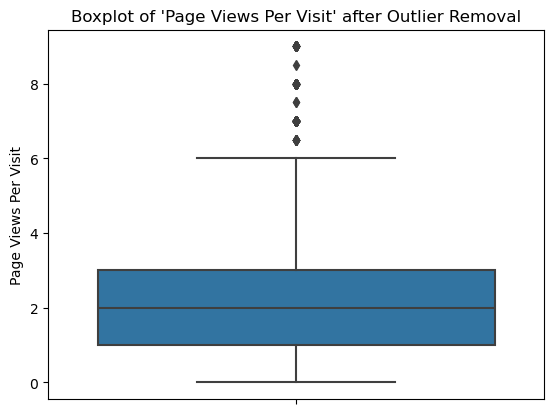

In [39]:
#Outlier Treatment: Remove top & bottom 5% of the Column Outlier values

# Remove top & bottom 5% of the Column Outlier values
Q3 = df_leads["Page Views Per Visit"].quantile(0.99)
Q1 = df_leads["Page Views Per Visit"].quantile(0.01)

# Filtering the data to remove top and bottom 5%
df_leads = df_leads[(df_leads["Page Views Per Visit"] <= Q3) & (df_leads["Page Views Per Visit"] >= Q1)]

# Plotting the boxplot after outlier treatment
sns.boxplot(y=df_leads["Page Views Per Visit"])
plt.title("Boxplot of 'Page Views Per Visit' after Outlier Removal")
plt.show()

c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


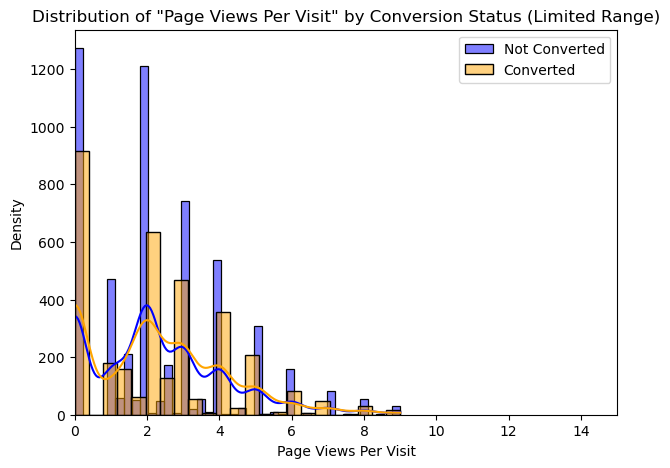

In [40]:
# Plotting the distribution of Total Visits split by Converted and Not Converted with x-axis limit
plt.figure(figsize=(7, 5))

# Plotting histogram and density for Not Converted
sns.histplot(df_leads[df_leads['Converted'] == 0]["Page Views Per Visit"], kde=True, color='blue', label='Not Converted', alpha=0.5)

# Plotting histogram and density for Converted
sns.histplot(df_leads[df_leads['Converted'] == 1]["Page Views Per Visit"], kde=True, color='orange', label='Converted', alpha=0.5)

# Adding title and labels
plt.title('Distribution of "Page Views Per Visit" by Conversion Status (Limited Range)')
plt.xlabel("Page Views Per Visit")
plt.ylabel('Density')
plt.xlim(0, 15)  # Limiting the x-axis to 0-15 for better visualization
plt.legend()

plt.show()

Feature Eng. -> Binning the column is heavily right-skewed, with most of the values falling between 0 and 4. Low (0-2),  Medium (2-4), High (4+).  Binning will simplify the distribution and help capture the trends between page views and conversion

In [41]:
# Define bin edges and labels
bin_edges = [0, 2, 4, df_leads['Page Views Per Visit'].max()]
bin_labels = ['Low', 'Medium', 'High']

# Create a new column with binned values
df_leads['Page_Views_Binned'] = pd.cut(df_leads['Page Views Per Visit'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Display the value counts for each bin
print(df_leads['Page_Views_Binned'].value_counts())

Page_Views_Binned
Low       5184
Medium    2656
High      1112
Name: count, dtype: int64


The distribution shows more blue bars compared to orange bars for higher counts of page views, which means that non-converted leads had more page views across different ranges. This indicates that having multiple page views alone does not guarantee conversion.
Converted leads show a higher distribution for 3-5 page views, indicating that a moderate level of exploration is correlated with a higher chance of conversion.
After 6 page views, the number of both converted and non-converted leads drops significantly, suggesting that extended browsing does not strongly influence conversion.

9 - Page Views Per Visit - Keep

##### 10 - Last Activity

In [42]:
#checking percentile values for "Total Visits"

df_leads['TotalVisits'].describe(percentiles=[.05,.25, .5, .75,.95, .99])

count    8952.000000
mean        3.142873
std         2.903895
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
95%         9.000000
99%        13.000000
max        17.000000
Name: TotalVisits, dtype: float64

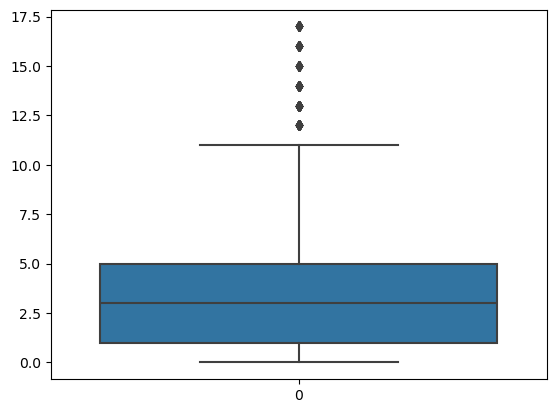

In [43]:
#visualizing boxplot 
sns.boxplot(df_leads['TotalVisits'])
plt.show()

EDA -  Remove outliers

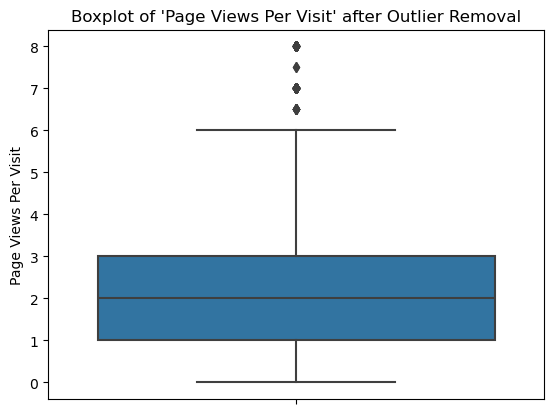

In [44]:
# Remove top & bottom 5% of the Column Outlier values
Q3 = df_leads["Page Views Per Visit"].quantile(0.99)
Q1 = df_leads["Page Views Per Visit"].quantile(0.01)

# Filtering the data to remove top and bottom 5%
df_leads = df_leads[(df_leads["Page Views Per Visit"] <= Q3) & (df_leads["Page Views Per Visit"] >= Q1)]

# Plotting the boxplot after outlier treatment
sns.boxplot(y=df_leads["Page Views Per Visit"])
plt.title("Boxplot of 'Page Views Per Visit' after Outlier Removal")
plt.show()

In [45]:
# Last Activity checking for mode value
df_leads['Last Activity'].value_counts()

Last Activity
email opened                    3369
sms sent                        2682
olark chat conversation          964
page visited on website          591
converted to lead                427
email bounced                    309
email link clicked               264
form submitted on website        114
unreachable                       87
unsubscribed                      60
had a phone conversation          24
approached upfront                 5
view in browser link clicked       4
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: count, dtype: int64

Feat Eng-  Binning les frequent categories, there are many categories that are less frequent, which may not add significant value to the model individually and could lead to sparsity in the data.

In [46]:
# Define a cutoff value for low-frequency activities
cutoff_value = 500

# Identify activities to be grouped into "Other Activities"
activities_to_replace = df_leads['Last Activity'].value_counts()[df_leads['Last Activity'].value_counts() < cutoff_value].index.tolist()

# Replace less frequent activities with "Other Activities" using .loc
df_leads.loc[df_leads['Last Activity'].isin(activities_to_replace), 'Last Activity'] = 'Other Activities'

# Check the updated value counts
print(df_leads['Last Activity'].value_counts())

Last Activity
email opened               3369
sms sent                   2682
Other Activities           1300
olark chat conversation     964
page visited on website     591
Name: count, dtype: int64


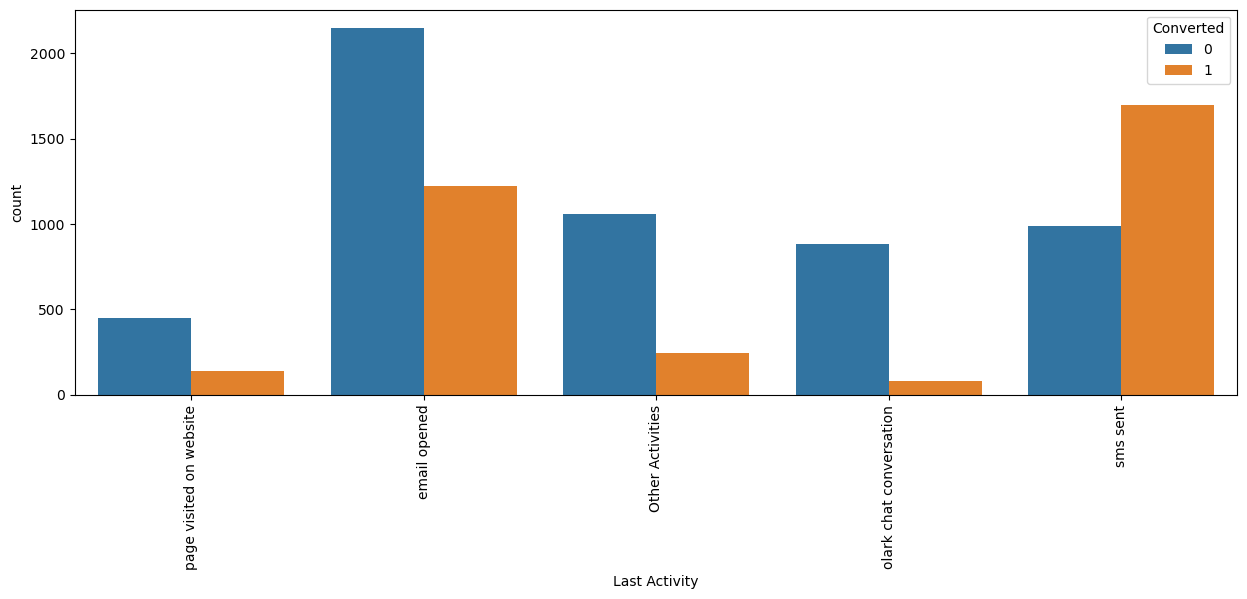

In [47]:
#visualizing the spread of the variable 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Last Activity', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

ggesting that while email engagement is common, it does not guarantee conversion.
SMS Sent stands out as a major activity with a high conversion rate.
The orange bar (converted) is higher than the blue bar (not converted), indicating that sending an SMS has a positive impact on conversion. This activity is associated with more conversions than non-conversions.
The blue bar is much higher compared to the orange bar, indicating that leads with Olark Chat Conversation are more likely to not convert.
This suggests that while chatting might engage the lead, it doesn’t necessarily lead to conversion.
SMS Sent appears to be a strong driver of conversion. Leads who were sent an SMS are more likely to convert, indicating that SMS is an effective follow-up method.
Email Opened is also a common last activity, but most of these leads do not convert, suggesting that simply opening an email is not sufficient to drive conversions.
Olark Chat Conversation has a higher likelihood of non-conversion, which could mean that leads engaged through chat require further actions to convert.

10 - Last Activity - Keep

##### 11 - Country

11 - Removed when dropped >55% null values

##### 12 - Specialization

In [48]:
# Calculate the percentage of null values in the "Specialization" column
null_percentage = df_leads['Specialization'].isnull().mean() * 100

# Print the percentage of null values
print(f"Percentage of null values in 'Specialization': {null_percentage:.2f}%")

Percentage of null values in 'Specialization': 36.82%


In [49]:
#describe specialization
df_leads.Specialization.describe()

count                   5627
unique                    18
top       finance management
freq                     943
Name: Specialization, dtype: object

EDA/Feature Eng. - Consider imputing the categorical NaN's with mode, but in this case as there is a  high percentage of missing values, imputing with "Not Specified" is preferred, to keep the distinction between known and unknown without artificially inflating a specific category.

In [50]:
# Imputing NaN values with "Not Specified"
df_leads['Specialization'] = df_leads['Specialization'].replace(np.nan, 'Not Specified')

In [51]:
#checking for values
df_leads['Specialization'].value_counts()

Specialization
Not Specified                        3279
finance management                    943
human resource management             812
marketing management                  810
operations management                 492
business administration               388
it projects management                358
supply chain management               334
banking, investment and insurance     319
media and advertising                 195
travel and tourism                    187
international business                171
healthcare management                 150
e-commerce                            106
hospitality management                105
retail management                      95
rural and agribusiness                 70
e-business                             54
services excellence                    38
Name: count, dtype: int64

Feature Eng. - Binning Management Specializations to reduce the coplexity of the feature to make it more manageable and potentially improve how a model learns from it

In [52]:
#bining Management Specializations 

df_leads['Specialization'] = np.where(df_leads['Specialization'].isin(['finance management', 'human resource management',
                                                                       'marketing management', 'operations management',
                                                                       'it projects management', 'supply chain management',
                                                                       'healthcare Management', 'hospitality management',
                                                                       'retail management']),
                                       'Management_Specializations', df_leads['Specialization'])

In [53]:
# specializations
df_leads.Specialization.value_counts()

Specialization
Management_Specializations           3949
Not Specified                        3279
business administration               388
banking, investment and insurance     319
media and advertising                 195
travel and tourism                    187
international business                171
healthcare management                 150
e-commerce                            106
rural and agribusiness                 70
e-business                             54
services excellence                    38
Name: count, dtype: int64

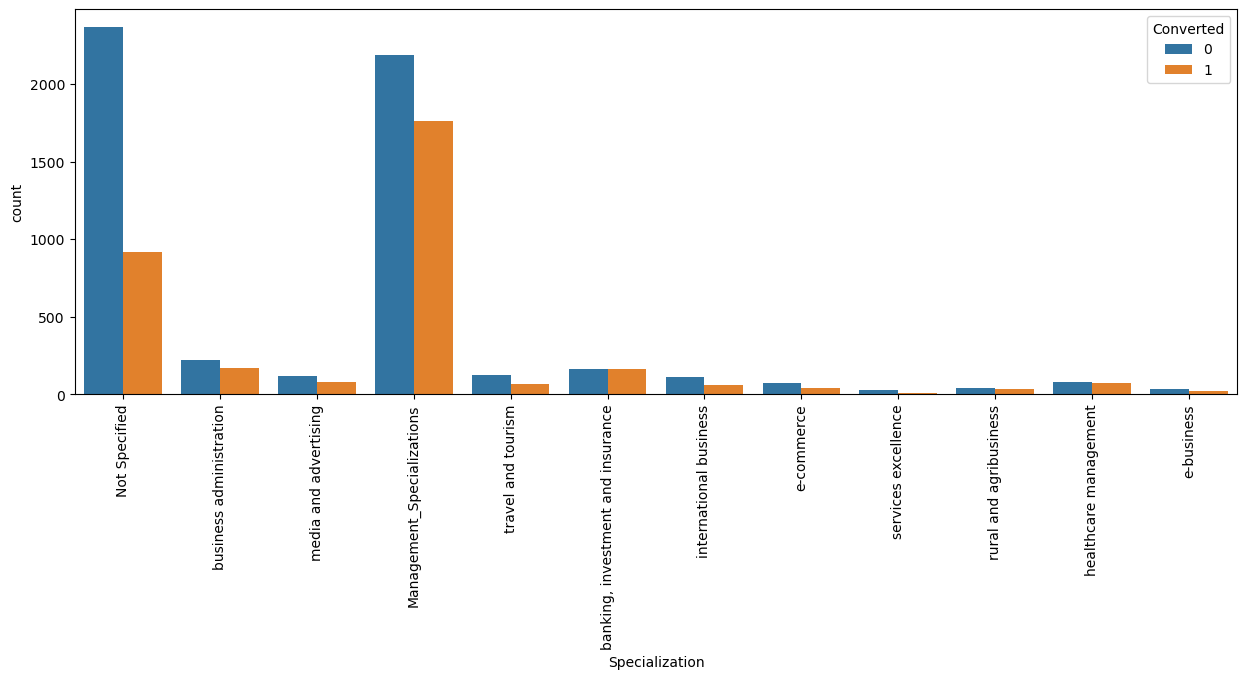

In [54]:
#plotting spread of Specialization columnn 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Specialization', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()



Feature Eng. Identified there are several small categories with similar conversion rate, so will merge them to "Other" category

In [55]:
# Define a cutoff value
cutoff_value = 500

# Create a list of Specialization to be replaced with 'Other'
specialization_to_replace = df_leads['Specialization'].value_counts()[df_leads['Specialization'].value_counts() < cutoff_value].index.tolist()

# Replace the infrequent Specialization with 'Other'
df_leads['Specialization'] = df_leads['Specialization'].apply(lambda x: 'Other' if x in specialization_to_replace else x)

# Check the updated value counts
print(df_leads['Specialization'].value_counts())

Specialization
Management_Specializations    3949
Not Specified                 3279
Other                         1678
Name: count, dtype: int64


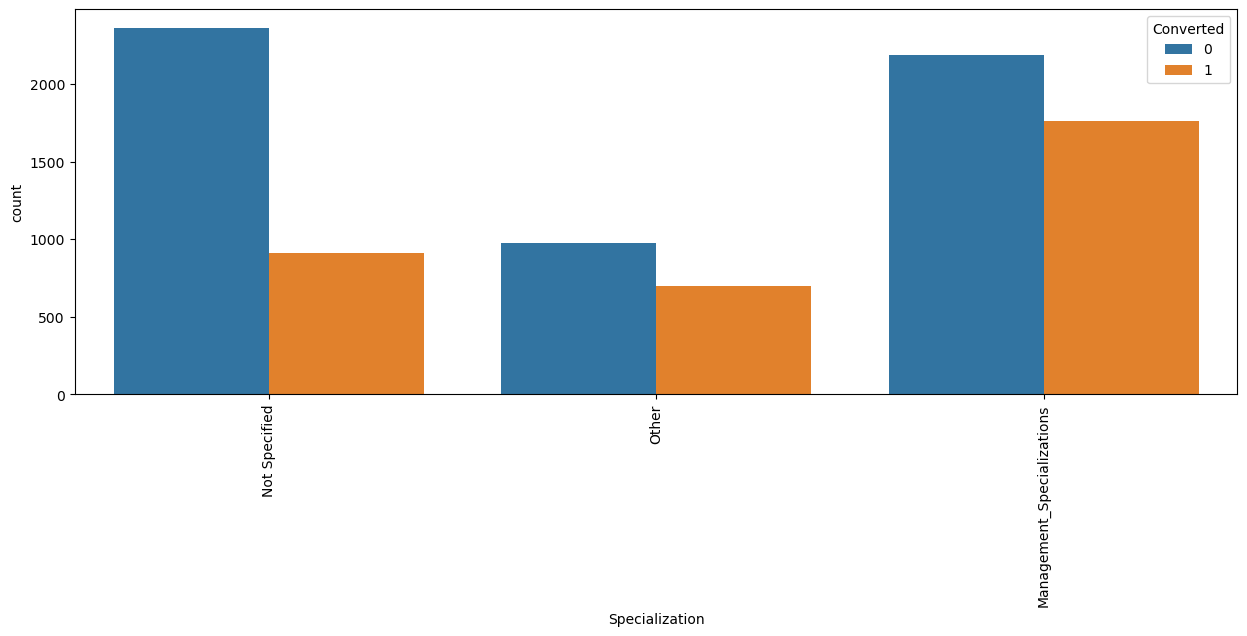

In [56]:
#plotting the spred of new Specialization columnn 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Specialization', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()


!!!We see that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.

Focus should be more on the Specialization with high conversion rate.

The "Not Specified" category has the highest number of leads but also a higher proportion of non-converted leads. This suggests that a lack of information regarding specialization might correlate with lower engagement or lower interest.
Management Specializations appears to be the most promising category, with a high conversion rate relative to the total leads. This could indicate that individuals with management-related interests are more likely to convert.
Specializations such as Business Administration and Media and Advertising have balanced counts of converted and non-converted leads, suggesting moderate potential for conversion.

The "Management Specializations" category is predictive of conversion, suggesting that having a specialization might correlate with a higher probability of conversion. This could be valuable information for the model.

12 - Specialization - Keep

##### 13 How did you hear about X Educuation

Deleted with %5% cut-off </br>
13 - How did you hear about X Educuation - Dropped

##### 14 - What is your current occupation?

In [57]:
#What is your current occupation
df_leads['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
unemployed              5377
NaN                     2635
working professional     662
student                  203
other                     13
housewife                  9
businessman                7
Name: count, dtype: int64

Feature Eng. - imputing NaN values with "Other" to differentiate missing data from existing categories and avoid introducing bias by adding too many "unemployed" instances.

In [58]:
# Imputing NaN values with "Other"
df_leads['What is your current occupation'] = df_leads['What is your current occupation'].replace(np.nan, 'other')

In [59]:
#What is your current occupation
df_leads['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
unemployed              5377
other                   2648
working professional     662
student                  203
housewife                  9
businessman                7
Name: count, dtype: int64

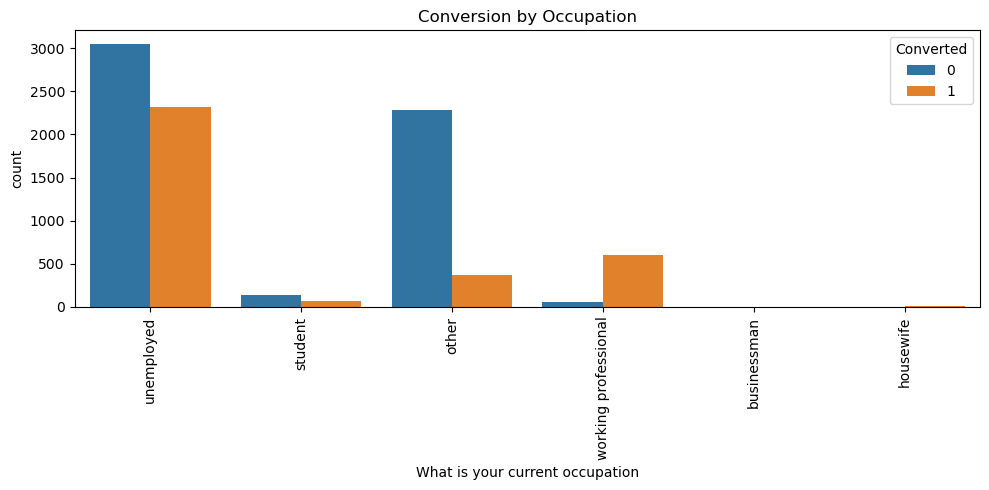

In [60]:
# Plotting the count plot
plt.figure(figsize=(10, 5))
sns.countplot(x='What is your current occupation', hue='Converted', data=df_leads)
plt.title('Conversion by Occupation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

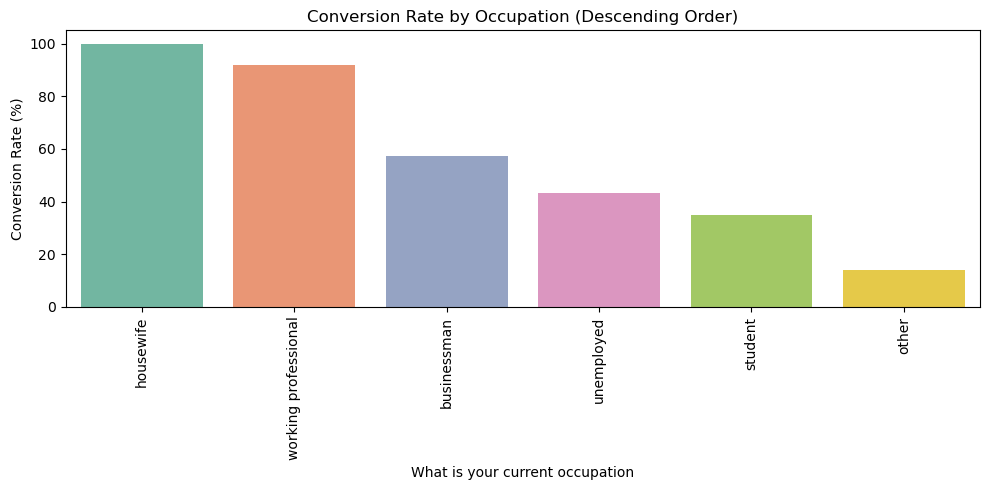

In [61]:
# Calculate the percentage of conversions for each occupation
conversion_rate = df_leads.groupby('What is your current occupation')['Converted'].mean() * 100

# Sort the conversion rate in descending order
conversion_rate_sorted = conversion_rate.sort_values(ascending=False)

# Plotting the conversion rate plot
plt.figure(figsize=(10, 5))
sns.barplot(x=conversion_rate_sorted.index, y=conversion_rate_sorted.values, palette='Set2')
plt.title('Conversion Rate by Occupation (Descending Order)')
plt.xticks(rotation=90)
plt.ylabel('Conversion Rate (%)')
plt.tight_layout()
plt.show()

Interesting insight for Marketing / Targeting 
The Housewife and Working Professional groups are high-quality leads based on their high conversion rates, despite their smaller lead counts.
Unemployed leads are numerous but have a lower conversion rate, indicating that while they are many, their quality is more varied.


14 - What is your Current Occupation  - Keep

##### 15 What matters most to you in choosing a course

In [62]:
#checking value counts
df_leads['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
better career prospects      6251
NaN                          2653
flexibility & convenience       1
other                           1
Name: count, dtype: int64

Imputing NaN values with mode

In [63]:
# Imputing NaN values with "better carreer prospects" (mode)
df_leads['What matters most to you in choosing a course'] = df_leads['What matters most to you in choosing a course'].replace(np.nan, 'better career prospects')

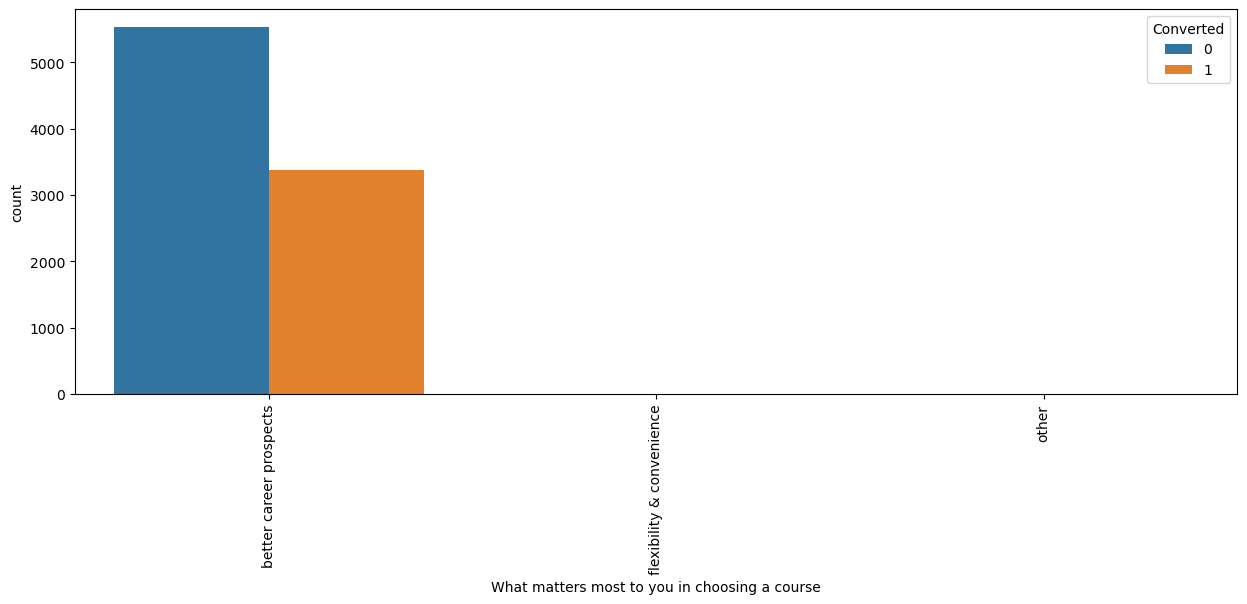

In [64]:
#plotting spread of What matters most to you in choosing a course columnn 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'What matters most to you in choosing a course', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

Feat. Eng  - Given that the majority of responses fall under better career prospects category, will convert to binary viariable, making the feature easier fot the model to interpret </br>
"1" for "better career prospects" </br>
"0" for everything else 


In [65]:
# Convert the 'What matters most to you in choosing a course' feature into a binary variable
df_leads['What matters most to you in choosing a course'] = np.where(
    df_leads['What matters most to you in choosing a course'] == 'better career prospects', 1, 0
)

# Check the updated column
print(df_leads['What matters most to you in choosing a course'].value_counts())

What matters most to you in choosing a course
1    8904
0       2
Name: count, dtype: int64


Marketing Insight -Better Career Prospects is by far the most significant factor for leads, suggesting that people are highly motivated by the potential for improving their careers when considering a course.

15 What matters most to you in choosing a course - keep

##### 16 Search </br> 
17 Magazine</br>
18 Newspaper Article</br>
19  X Education Forums</br>
20 Newspaper</br>
21 Digital Advertisement</br>
22 Through Recommendations</br>
23 Receive More Updates About Our Courses.

Will analyze these in a batch as they are all binary categories

In [66]:
df_leads.Search.value_counts(dropna=False)

Search
no     8893
yes      13
Name: count, dtype: int64

In [67]:
# Calculate the percentage of "no" in the "Search" column
no_percentage = (df_leads['Search'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'Search': {no_percentage:.2f}%")

Percentage of 'no' in 'Search': 99.85%


In [68]:
df_leads.Magazine.value_counts(dropna=False)
# Calculate the percentage of "no" in the "Magazine" column
no_percentage = (df_leads['Magazine'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'Magazine': {no_percentage:.2f}%")

Percentage of 'no' in 'Magazine': 100.00%


In [69]:
# Calculate the percentage of "no" in the "Newspaper Article" column
no_percentage = (df_leads['Newspaper Article'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'Newspaper Article': {no_percentage:.2f}%")

Percentage of 'no' in 'Newspaper Article': 100.00%


In [70]:
# Calculate the percentage of "no" in the "X Education Forums" column
no_percentage = (df_leads['X Education Forums'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'X Education Forums': {no_percentage:.2f}%")

Percentage of 'no' in 'X Education Forums': 100.00%


In [71]:
# Calculate the percentage of "no" in the "Newspaper" column
no_percentage = (df_leads['Newspaper'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'Newspaper': {no_percentage:.2f}%")

Percentage of 'no' in 'Newspaper': 99.99%


In [72]:
# Calculate the percentage of "no" in the "Digital Advertisement" column
no_percentage = (df_leads['Digital Advertisement'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'Digital Advertisement': {no_percentage:.2f}%")

Percentage of 'no' in 'Digital Advertisement': 99.98%


In [73]:
# Calculate the percentage of "no" in the "Through Recommendations" column
no_percentage = (df_leads['Through Recommendations'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'Through Recommendations': {no_percentage:.2f}%")

Percentage of 'no' in 'Through Recommendations': 99.93%


In [74]:
# Calculate the percentage of "no" in the "Receive More Updates About Our Courses" column
no_percentage = (df_leads['Receive More Updates About Our Courses'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'Receive More Updates About Our Courses': {no_percentage:.2f}%")

Percentage of 'no' in 'Receive More Updates About Our Courses': 100.00%


Noticing an imbalance in each one, will try to combine into one column and see if they have a better output

In [75]:
# List of columns to combine
columns_to_combine = [
    'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 
    'Newspaper', 'Digital Advertisement', 'Through Recommendations', 
    'Receive More Updates About Our Courses'
]

# Create a new column "Marketing Engagement"
df_leads['Marketing Engagement'] = df_leads[columns_to_combine].apply(lambda x: 1 if (x == 'yes').any() else 0, axis=1)

# Drop the original columns, as they are combined into a new feature
df_leads = df_leads.drop(columns=columns_to_combine)

# Check the distribution of the new feature
print(df_leads['Marketing Engagement'].value_counts(normalize=True) * 100)

Marketing Engagement
0    99.775432
1     0.224568
Name: proportion, dtype: float64


Due to extreme imbalance in these colums (>99% of No's), they will be dropped. It likely won't provide useful information for the model to make accurate predictions, and may instead contribute to overfitting or add unnecessary complexity.

16 Search - Dropped </br>
17 Magazine - Drpped </br>
18 Newspaper Article  - Dropped </br>
19 X Education Forums  - Dropped </br>
20 Newspaper  - Dropped </br>
21 Digital Advertisement  - Dropped </br>
22 Through Recommendations  - Dropped </br>
23 Receive More Updates About Our Courses - Dropped </br>

In [76]:
#dropping Marketing Engagement columns 
df_leads.drop(["Marketing Engagement"], axis=1, inplace = True)
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Time_Spent_Binned,Page_Views_Binned
0,api,olark chat,0,0,0,0.0,0,0.0,page visited on website,NaN,...,NaN,02.medium,02.medium,15.0,15.0,no,no,modified,Low,Low
1,api,organic search,0,0,0,5.0,674,2.5,email opened,india,...,NaN,02.medium,02.medium,15.0,15.0,no,no,email opened,Medium,Medium
2,landing page submission,direct traffic,0,0,1,2.0,1532,2.0,email opened,india,...,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened,High,Low
3,landing page submission,direct traffic,0,0,0,1.0,305,1.0,Other Activities,india,...,mumbai,02.medium,01.high,13.0,17.0,no,no,modified,Low,Low
4,landing page submission,google,0,0,1,2.0,1428,1.0,Other Activities,india,...,mumbai,02.medium,01.high,15.0,18.0,no,no,modified,Medium,Low


##### 24 Tags

In [77]:
#checking value counts of Tag variable
df_leads['Tags'].value_counts(dropna=False)

Tags
NaN                                                  3275
will revert after reading the email                  1989
ringing                                              1152
interested in other courses                           502
already a student                                     460
closed by horizzon                                    290
switched off                                          235
busy                                                  182
lost to eins                                          168
not doing further education                           135
interested  in full time mba                          115
graduation in progress                                109
invalid number                                         80
diploma holder (not eligible)                          63
wrong number given                                     44
opp hangup                                             33
number not provided                                    26
in touch 

Because the NaN values are grater than the mode, cannot impute the NaN values with Mode, let's impute it with "Not Specified"

In [78]:
#replacing Nan values with "Tags"
df_leads['Tags'] = df_leads['Tags'].replace(np.nan,'Not Specified')

Feat Eng - Binning

In [79]:
# Binning, Define a cutoff value
cutoff_value = 100

# Create a list of lead sources to be replaced with 'Other'
lead_sources_to_replace = df_leads['Tags'].value_counts()[df_leads['Tags'].value_counts() < cutoff_value].index.tolist()

# Replace the infrequent lead sources with 'Other'
df_leads['Tags'] = df_leads['Tags'].apply(lambda x: 'Other' if x in lead_sources_to_replace else x)

# Check the updated value counts
print(df_leads['Tags'].value_counts())

Tags
Not Specified                          3275
will revert after reading the email    1989
ringing                                1152
interested in other courses             502
already a student                       460
Other                                   294
closed by horizzon                      290
switched off                            235
busy                                    182
lost to eins                            168
not doing further education             135
interested  in full time mba            115
graduation in progress                  109
Name: count, dtype: int64


In [80]:
#binning  tags with low frequency 
df_leads['Tags'] = df_leads['Tags'].replace(['switched off', 'busy','lost to eins',
                                     'not doing further education','interested  in full time mba'], 'Not Interested/Low Engagement')

df_leads['Tags'] = df_leads['Tags'].replace(['already a student',
                                       'interested in other courses'] , 'Already Engaged/Irrelevant')

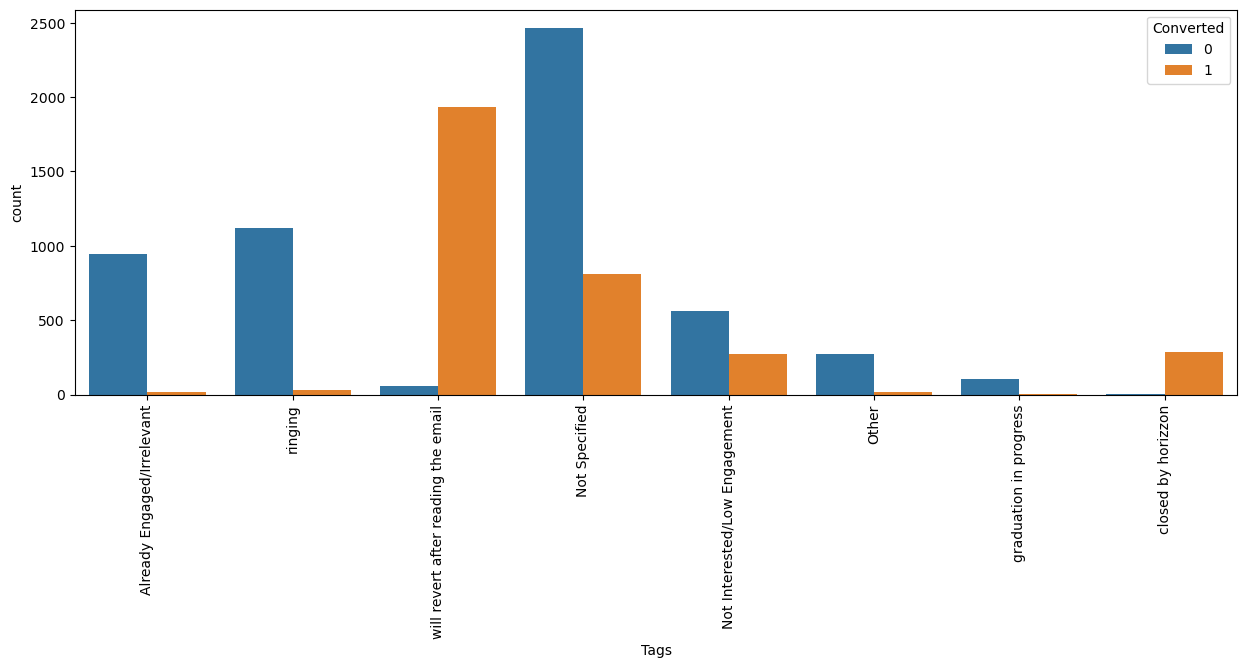

In [81]:
#plotting spread of Specialization columnn 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Tags', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

Key Insights:
"Will Revert After Reading the Email" appears to be a strong indicator of conversion, suggesting that these leads have higher intent and engagement.
"Not Specified" has the highest number of non-converted leads, which could mean that a lack of a specific tag correlates with a lower likelihood of conversion.
"Ringing" and "Already a Student" tags are associated more with non-conversion, indicating a lower likelihood of converting or possibly representing existing customers rather than new leads.

Feature enginiring combining low engagemtne tags

24. Tags - Keep

25 - Lead Quality

In [82]:
#checking value counts of Tag variable
df_leads['Lead Quality'].value_counts(dropna=False)

Lead Quality
NaN                  4640
might be             1492
not sure             1058
worst                 591
high in relevance     582
low in relevance      543
Name: count, dtype: int64

NaN values will be reclassified as "not sure", because the NaN values are grater than the mode, cannot impute the NaN values with Mode

In [83]:
#replacing Nan values with "Lead Quality"
df_leads['Lead Quality'] = df_leads['Lead Quality'].replace(np.nan,'not sure')

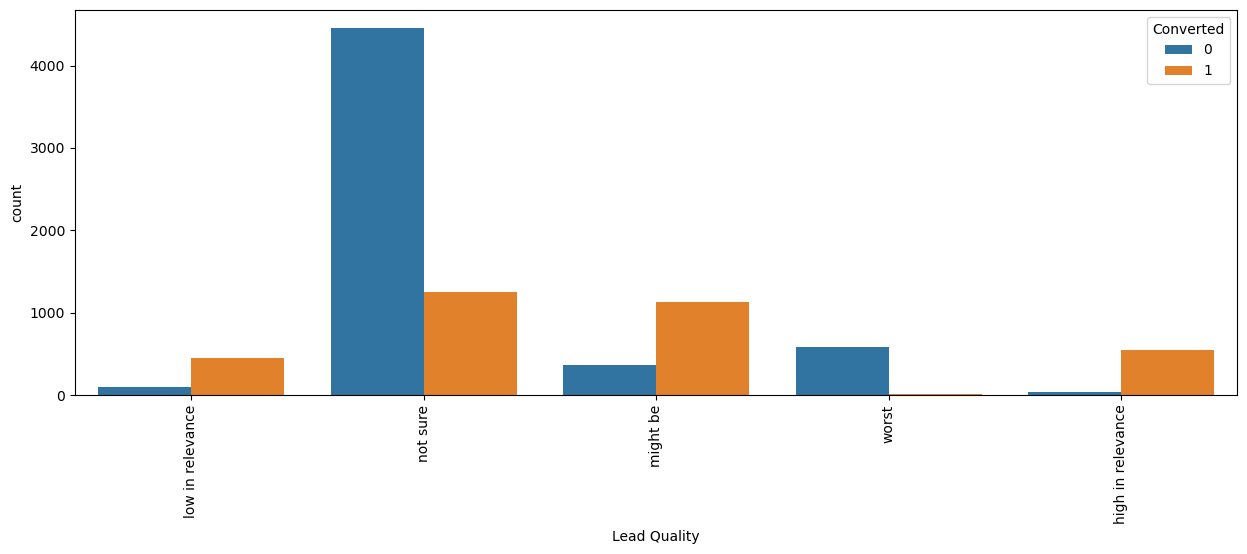

In [84]:
#plotting spread of Lead Quality columnn 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Lead Quality', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

For this Feature I had to reset the cut off for Null from initial 45% that was stablished to 55% to be able to get this colum, which I considered had valueable information eventhough it had a high percentage of empty values. This value is based on the data and intuition the the employee who has been assigned to the lead. (Resources/ Leads Data Dictionary.xlsx)
It was the right choice as there are valueable insights and the feature is highly informative.

High Conversion Categories:

"High in Relevance" leads have an almost perfect conversion rate, suggesting that these leads should be pursued aggressively.
The "Low in Relevance" category also has a surprising number of conversions, indicating potential that should not be completely disregarded.
Mixed Conversion Category:

"Might Be" has a balanced conversion rate, indicating that these leads are uncertain but still have a reasonable chance of converting with appropriate follow-up.
Low Conversion Categories:

"Not Sure" and "Worst" categories show poor conversion rates. The "Not Sure" category especially has a high number of non-converted leads, indicating that this group requires a more careful and targeted approach if pursued.

25 Lead Quality - Keep

##### 26 Update me on Suppy Chain Content </br> 27 Get updates on DM Content

In [85]:
# Calculate the percentage of "no" in the "Update me on Supply Chain Content" column
no_percentage = (df_leads['Update me on Supply Chain Content'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'Update me on Supply Chain Content': {no_percentage:.2f}%")

Percentage of 'no' in 'Update me on Supply Chain Content': 100.00%


In [86]:
# Calculate the percentage of "no" in the "Get updates on DM Content" column
no_percentage = (df_leads['Get updates on DM Content'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'Get updates on DM Content': {no_percentage:.2f}%")

Percentage of 'no' in 'Get updates on DM Content': 100.00%


Due to extreme imbalance in this colum (100% of No's), it will be dropped. It likely it won't provide useful information for the model to make accurate predictions, and may instead contribute to overfitting or add unnecessary complexity.

26 Update me on Supply Chain Content - Dropped </br>
27 Get updates on DM Content - Dropped

In [87]:
#dropping Update me on Supply Chain Content column 
df_leads.drop(["Update me on Supply Chain Content", "Get updates on DM Content"], axis=1, inplace = True)
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8906 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    8906 non-null   object  
 1   Lead Source                                    8877 non-null   object  
 2   Do Not Email                                   8906 non-null   int64   
 3   Do Not Call                                    8906 non-null   int64   
 4   Converted                                      8906 non-null   int64   
 5   TotalVisits                                    8906 non-null   float64 
 6   Total Time Spent on Website                    8906 non-null   int64   
 7   Page Views Per Visit                           8906 non-null   float64 
 8   Last Activity                                  8906 non-null   object  
 9   Country                                       

##### 28 Lead Profile


Deleted with 55% cut-off, as this column had 74.19 null values </br>
28 - Lead Profile  - Dropped

** would like to come back and analyize the data, though

##### 29 City

In [88]:
#checking value counts of City variable
df_leads['City'].value_counts(dropna=False)

City
NaN                            3573
mumbai                         3086
thane & outskirts               718
other cities                    665
other cities of maharashtra     433
other metro cities              361
tier ii cities                   70
Name: count, dtype: int64

EDA in this case, even that NaN is grater than the mode, let's impute with the mode Mumbai

In [89]:
df_leads['City'] = df_leads['City'].replace(np.nan,'mumbai')

Feature Eng - binning

In [90]:
# Grouping cities into broader categories based on region/size
df_leads['City'] = df_leads['City'].replace(['other metro cities','thane & outskirts'], 'other metro')

df_leads['City'] = df_leads['City'].replace(['other cities',
                                       'other cities of maharashtra', 'tier ii cities'] , 'non-metro')


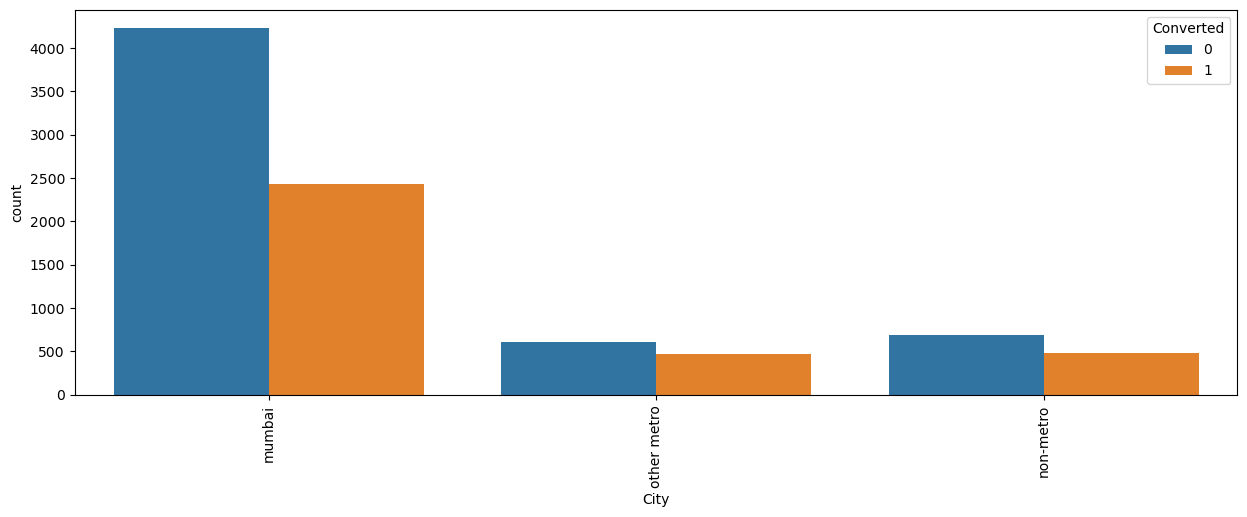

In [91]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'City', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

Focus on Mumbai:

Mumbai is the most important city in terms of lead generation and conversion. Although there are more non-conversions, the conversion volume is still the highest among all cities, indicating that marketing efforts in Mumbai can lead to higher returns if optimized effectively.
Low Conversion Cities:

"Thane & Outskirts", "Other Metro Cities", and "Other Cities of Maharashtra" show lower engagement with more non-conversions, suggesting that these areas might not be as effective for focused marketing campaigns.

Feature engineering - binning

29 City - Keep

##### 30 Asymmetrique Activity Index   </br>
31 Asymmetrique Profile Index </br>
32 Asymmetrique Activity Score </br>
33 Asymmetrique Profile Score </br>

As per the Leads Data Dictionary.xlsx these columns are: An index and score assigned to each customer based on their activity and their profile. Asymmetrique Activity Index and Assimetric Profile Index are categorical, while Asymmetric Activity Score and Asymmetrique Profile Score are numerical
I'm interested in the corelation between these features and conversions, but need to consider that they have high null data (+45%)

In [92]:
#checking value counts of City variable
df_leads['Asymmetrique Activity Index'].value_counts(dropna=False)

Asymmetrique Activity Index
NaN          4093
02.medium    3687
01.high       770
03.low        356
Name: count, dtype: int64

In [93]:
#replacing Nan values with "Asymmetrique Activity Index"
df_leads['Asymmetrique Activity Index'] = df_leads['Asymmetrique Activity Index'].replace(np.nan,'0. Unclassified')
#checking value counts of City variable
df_leads['Asymmetrique Activity Index'].value_counts(dropna=False)

Asymmetrique Activity Index
0. Unclassified    4093
02.medium          3687
01.high             770
03.low              356
Name: count, dtype: int64

In [94]:
#checking value counts of City variable
df_leads['Asymmetrique Profile Index'].value_counts(dropna=False)

Asymmetrique Profile Index
NaN          4093
02.medium    2695
01.high      2090
03.low         28
Name: count, dtype: int64

In [95]:
#replacing Nan values with "Asymmetrique Profile Index"
df_leads['Asymmetrique Profile Index'] = df_leads['Asymmetrique Profile Index'].replace(np.nan,'0.Unclassified')
#checking value counts of City variable
df_leads['Asymmetrique Profile Index'].value_counts(dropna=False)

Asymmetrique Profile Index
0.Unclassified    4093
02.medium         2695
01.high           2090
03.low              28
Name: count, dtype: int64

In [96]:
# Binning "Asymmetrique Activity Index"
df_leads['Asymmetrique Activity Index'] = df_leads['Asymmetrique Activity Index'].replace({
    "01.high": 'high',
    "02.medium": 'medium',
    "03.low": 'low'
})

# Binning "Asymmetrique Profile Index"
df_leads['Asymmetrique Profile Index'] = df_leads['Asymmetrique Profile Index'].replace({
    "01.high": 'high',
    "02.medium": 'medium',
    "03.low": 'low'
})


<Axes: xlabel='Converted', ylabel='Asymmetrique Activity Score'>

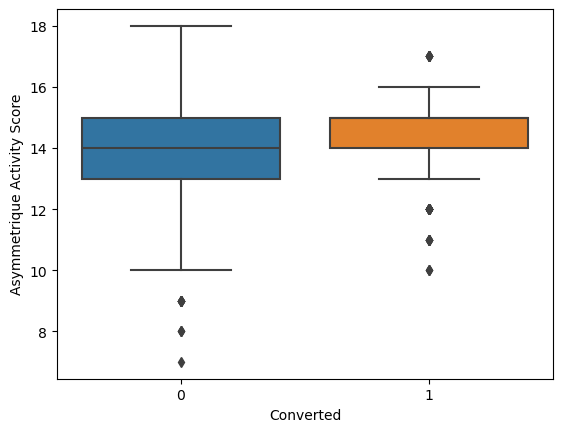

In [97]:
sns.boxplot(y = 'Asymmetrique Activity Score', x = 'Converted', data = df_leads)

EDA - manage outliers

In [98]:
Q1 = df_leads['Asymmetrique Activity Score'].quantile(0.25)
Q3 = df_leads['Asymmetrique Activity Score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')
df_leads['Asymmetrique Activity Score'] = df_leads['Asymmetrique Activity Score'].apply(
    lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

Lower Bound: 12.5, Upper Bound: 16.5


<Axes: xlabel='Converted', ylabel='Asymmetrique Activity Score'>

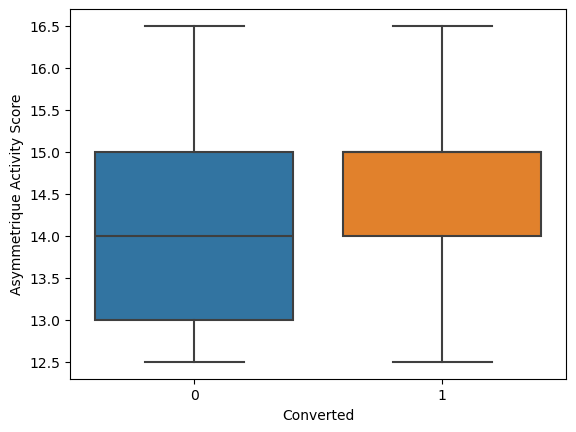

In [99]:
sns.boxplot(y = 'Asymmetrique Activity Score', x = 'Converted', data = df_leads)

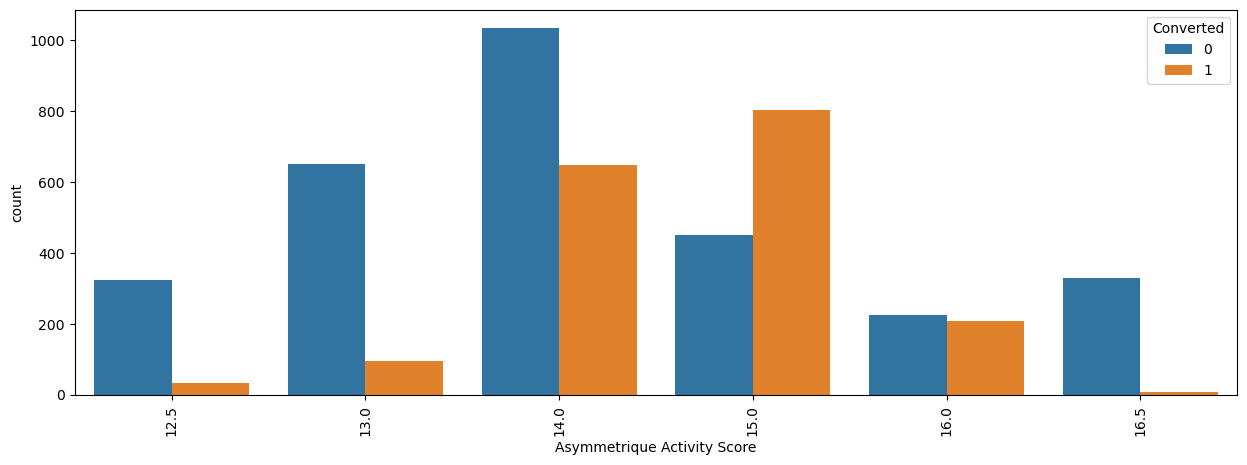

In [100]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Asymmetrique Activity Score', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Colli\new_anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


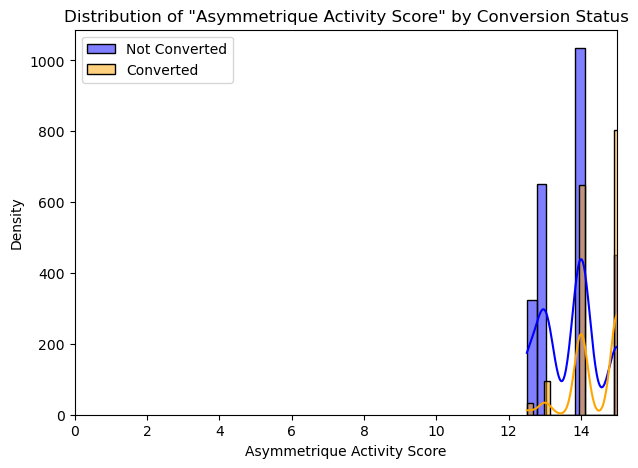

In [101]:
# Plotting the distribution of Total Visits split by Converted and Not Converted with x-axis limit
plt.figure(figsize=(7, 5))

# Plotting histogram and density for Not Converted
sns.histplot(df_leads[df_leads['Converted'] == 0]["Asymmetrique Activity Score"], kde=True, color='blue', label='Not Converted', alpha=0.5)

# Plotting histogram and density for Converted
sns.histplot(df_leads[df_leads['Converted'] == 1]["Asymmetrique Activity Score"], kde=True, color='orange', label='Converted', alpha=0.5)

# Adding title and labels
plt.title('Distribution of "Asymmetrique Activity Score" by Conversion Status')
plt.xlabel("Asymmetrique Activity Score")
plt.ylabel('Density')
plt.xlim(0, 15)  # Limiting the x-axis to 0-15 for better visualization
plt.legend()

plt.show()

<Axes: xlabel='Converted', ylabel='Asymmetrique Profile Score'>

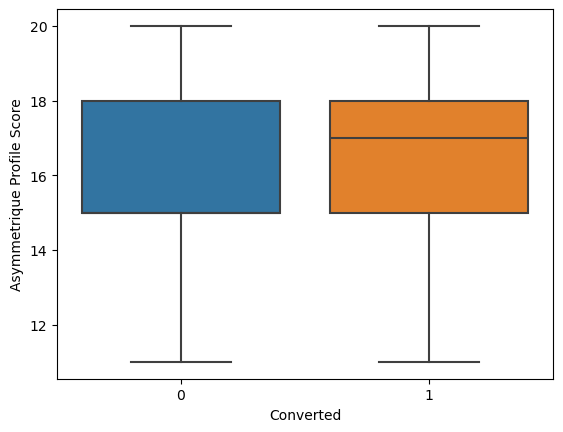

In [102]:
sns.boxplot(y = 'Asymmetrique Profile Score', x = 'Converted', data = df_leads)

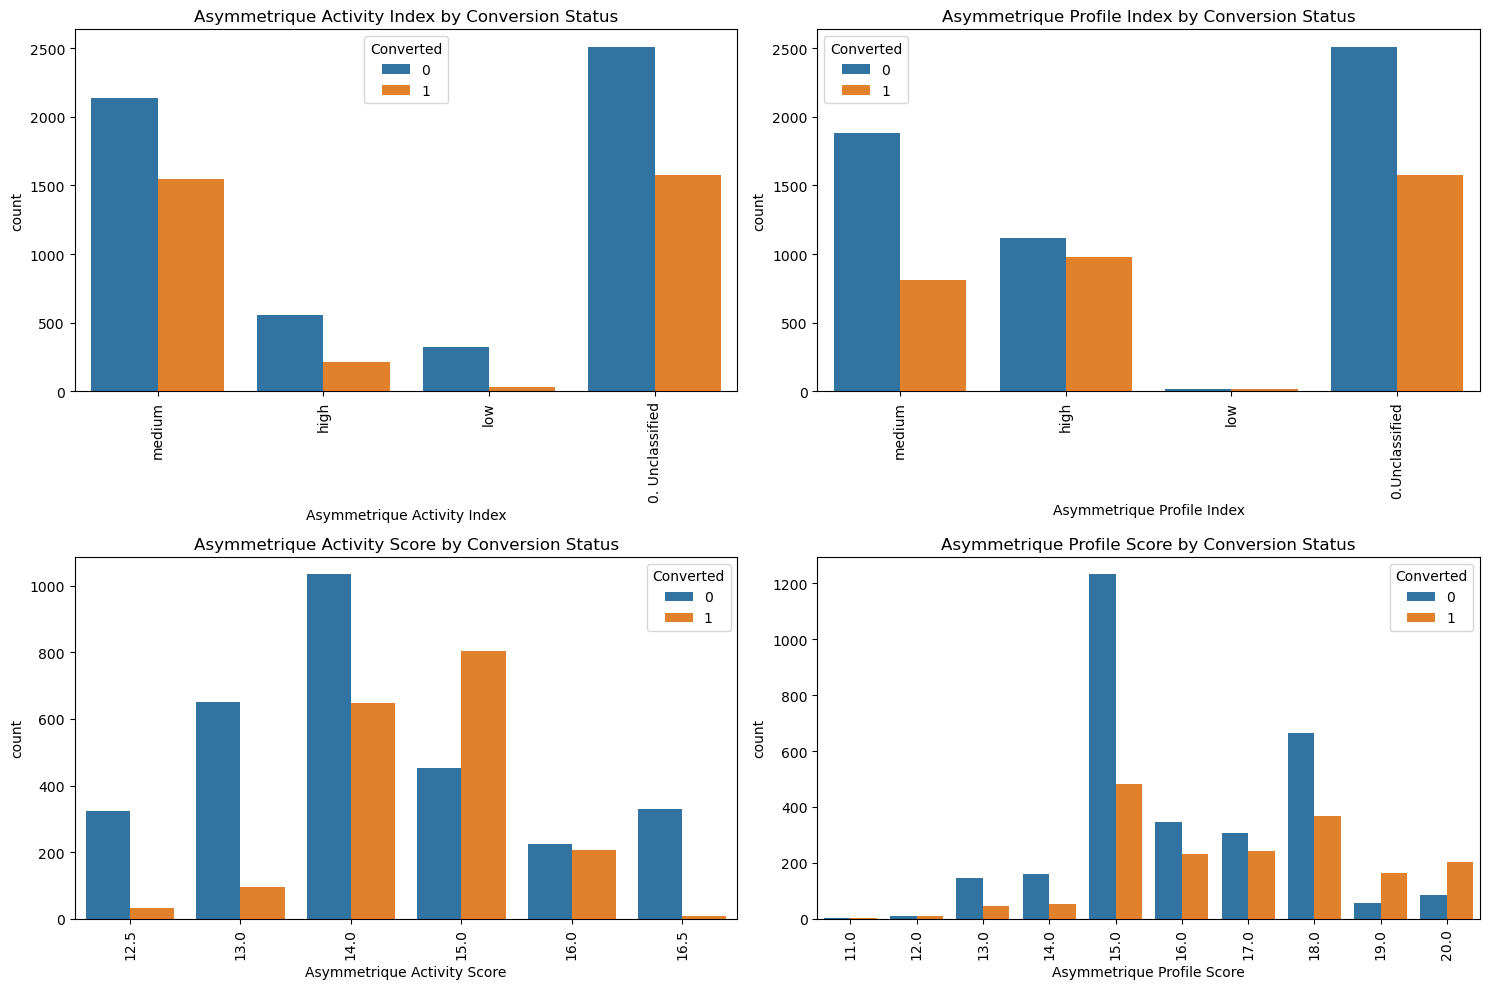

In [103]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15, 10))  # Adjust the figure size to accommodate 4 subplots

# Plotting 'Asymmetrique Activity Index' with 'Converted' as hue
ax1 = plt.subplot(2, 2, 1)
sns.countplot(x='Asymmetrique Activity Index', hue='Converted', data=df_leads, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title("Asymmetrique Activity Index by Conversion Status")

# Plotting 'Asymmetrique Profile Index' with 'Converted' as hue
ax2 = plt.subplot(2, 2, 2)
sns.countplot(x='Asymmetrique Profile Index', hue='Converted', data=df_leads, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title("Asymmetrique Profile Index by Conversion Status")

# Plotting 'Asymmetrique Activity Score' with 'Converted' as hue
ax3 = plt.subplot(2, 2, 3)
sns.countplot(x='Asymmetrique Activity Score', hue='Converted', data=df_leads, ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
ax3.set_title("Asymmetrique Activity Score by Conversion Status")

# Plotting 'Asymmetrique Profile Score' with 'Converted' as hue
ax4 = plt.subplot(2, 2, 4)
sns.countplot(x='Asymmetrique Profile Score', hue='Converted', data=df_leads, ax=ax4)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)
ax4.set_title("Asymmetrique Profile Score by Conversion Status")

plt.tight_layout()  # Adjust the spacing between subplots for better visual clarity
plt.show()

Asymmetrique Activity Index by Conversion Status (Top-Left)
Medium: There are significantly more leads with a medium activity index that did not convert (blue) compared to those that converted (orange). However, a considerable number did convert as well.
High and Low: There are fewer leads overall with high and low activity indices, with a slight preference for conversion in the high index group.
Unclassified: A large number of leads are unclassified, with both converted and non-converted leads present in this category.
2. Asymmetrique Profile Index by Conversion Status (Top-Right)
Medium: Similar to the activity index, the medium profile index group shows more non-converted leads, although there is also a notable number of converted leads.
High: Leads with a high profile index tend to convert more frequently compared to those with medium or low indices.
Unclassified: A significant number of leads fall into the unclassified category, and conversion seems reasonably likely for this group.
3. Asymmetrique Activity Score by Conversion Status (Bottom-Left)
The activity score peaks at 14.0 for non-converted leads, whereas converted leads tend to have high counts at 15.0.
There is a noticeable difference in the conversion rates for activity scores between 13.0 and 15.0.
Scores 12.5 and 16.5 have relatively few leads, suggesting these scores may have minimal influence on conversions.
4. Asymmetrique Profile Score by Conversion Status (Bottom-Right)
The profile score of 15.0 has the highest count for non-converted leads, whereas converted leads show more variety, with peaks around 17.0 and 18.0.
Scores of 11.0, 12.0, and 13.0 seem to have low lead counts overall, suggesting they may not be as relevant.

based on some activity on conversion, we will keep for initial  model. the correlation 
Keep the Asymmetrique Activity Score and Profile Score for now since they have weak positive correlations with conversion, indicating they might contribute to the model's performance.
Asymmetrique Activity Index and Profile Index can also be retained initially to provide complementary information.
After training the model, assess the importance of these features, and consider dropping or combining them if they do not contribute significantly.
Use feature selection and importance analysis to decide their final inclusion.

30 Asymmetrique Activity Index - Keep  </br>
31 Asymmetrique Profile Index - Keep </br>
32 Asymmetrique Activity Score - Keep </br>
33 Asymmetrique Profile Score - Keep </br>


##### 34 I agree to pay the amount through cheque </br>


In [104]:
# Calculate the percentage of "no" in the "I agree to pay the amount through cheque" column
no_percentage = (df_leads['I agree to pay the amount through cheque'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'I agree to pay the amount through cheque': {no_percentage:.2f}%")

Percentage of 'no' in 'I agree to pay the amount through cheque': 100.00%


Due to extreme imbalance in this colum (100% of No's), it will be dropped. It likely it won't provide useful information for the model to make accurate predictions, and may instead contribute to overfitting or add unnecessary complexity.

34 I agree to pay the amount through cheque - Dropped </br>

In [105]:
#dropping Update me on Supply Chain Content column 
df_leads.drop(["I agree to pay the amount through cheque"], axis=1, inplace = True)
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8906 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    8906 non-null   object  
 1   Lead Source                                    8877 non-null   object  
 2   Do Not Email                                   8906 non-null   int64   
 3   Do Not Call                                    8906 non-null   int64   
 4   Converted                                      8906 non-null   int64   
 5   TotalVisits                                    8906 non-null   float64 
 6   Total Time Spent on Website                    8906 non-null   int64   
 7   Page Views Per Visit                           8906 non-null   float64 
 8   Last Activity                                  8906 non-null   object  
 9   Country                                       

##### 35 A free copy of Mastering The Interview

In [106]:
# Calculate the percentage of "no" in the "A free copy of Mastering The Interview" column
no_percentage = (df_leads['A free copy of Mastering The Interview'].value_counts(normalize=True)['no']) * 100
print(f"Percentage of 'no' in 'A free copy of Mastering The Interview': {no_percentage:.2f}%")

Percentage of 'no' in 'A free copy of Mastering The Interview': 68.91%


In [107]:
#checking total rows and cols in dataset
df_leads.shape

(8906, 24)

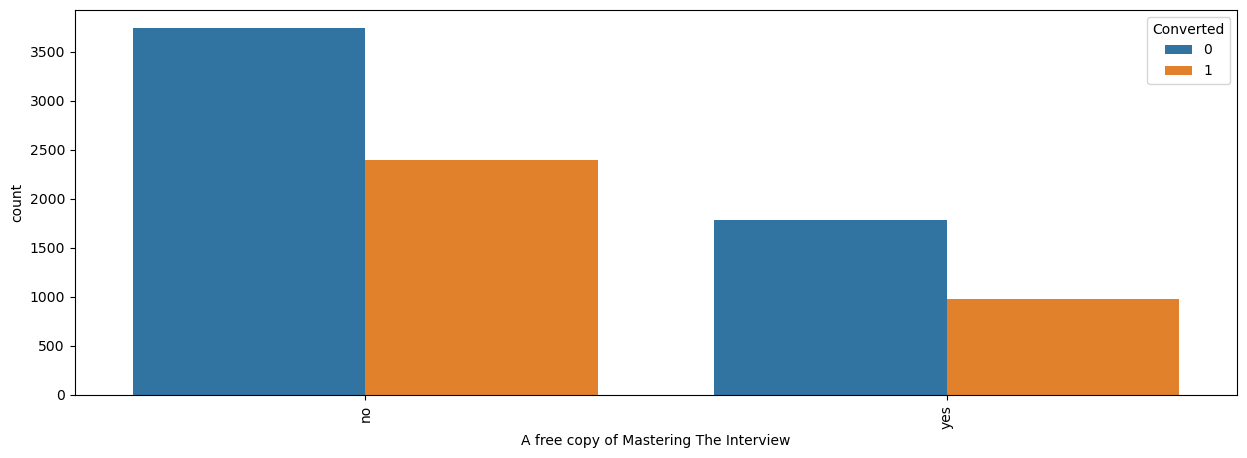

In [108]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'A free copy of Mastering The Interview', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

Feature Eng. checking for correlation to Converted 

In [109]:
# Convert 'yes' to 1 and 'no' to 0 for correlation calculation
df_leads['Free_Copy_Binary'] = df_leads['A free copy of Mastering The Interview'].replace({'yes': 1, 'no': 0})

# Check correlation between the binary version of the feature and the target variable
corr = df_leads['Free_Copy_Binary'].corr(df_leads['Converted'])
print(f"Correlation with Converted: {corr}")

Correlation with Converted: -0.034783926063323346


C:\Users\Colli\AppData\Local\Temp\ipykernel_3108\3352085433.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_leads['Free_Copy_Binary'] = df_leads['A free copy of Mastering The Interview'].replace({'yes': 1, 'no': 0})


Due to the low correlation and the following considerations </br>
- there is not a strong resson to believe that this feature will affect the desicion of conversion</br>
- There is no interaction of this feature that contibutes with other features. (need to validate with tree-base method)

35 A free copy of Mastering The Interview - Drop

In [110]:
#dropping A free copy of Mastering The Interview column 
df_leads.drop(["A free copy of Mastering The Interview"], axis=1, inplace = True)
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8906 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    8906 non-null   object  
 1   Lead Source                                    8877 non-null   object  
 2   Do Not Email                                   8906 non-null   int64   
 3   Do Not Call                                    8906 non-null   int64   
 4   Converted                                      8906 non-null   int64   
 5   TotalVisits                                    8906 non-null   float64 
 6   Total Time Spent on Website                    8906 non-null   int64   
 7   Page Views Per Visit                           8906 non-null   float64 
 8   Last Activity                                  8906 non-null   object  
 9   Country                                       

##### 36 Last Notable Activity

In [111]:
#checking value counts of last Notable Activity
df_leads['Last Notable Activity'].value_counts()

Last Notable Activity
modified                        3212
email opened                    2772
sms sent                        2128
page visited on website          286
olark chat conversation          182
email link clicked               170
email bounced                     59
unsubscribed                      46
unreachable                       31
had a phone conversation          13
email marked spam                  2
approached upfront                 1
resubscribed to emails             1
view in browser link clicked       1
form submitted on website          1
email received                     1
Name: count, dtype: int64

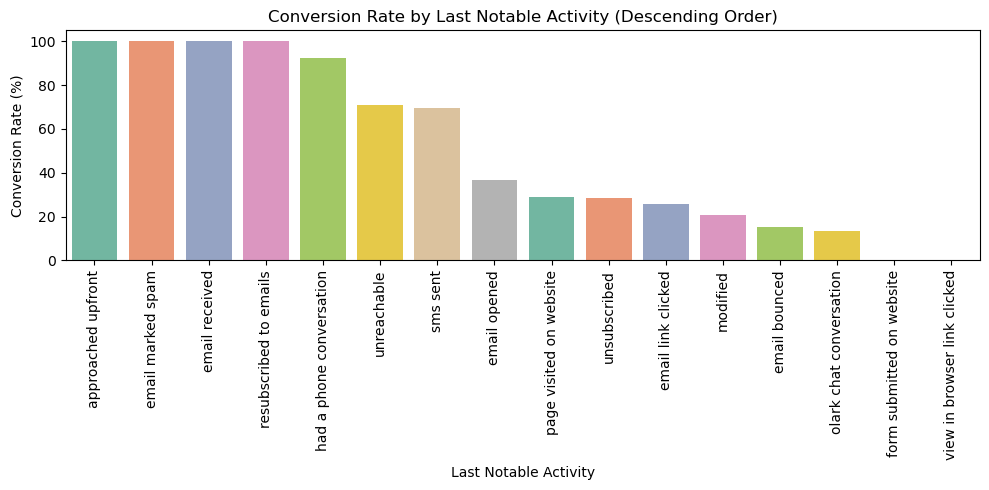

In [112]:
# Calculate the percentage of conversions for each occupation
conversion_rate = df_leads.groupby('Last Notable Activity')['Converted'].mean() * 100

# Sort the conversion rate in descending order
conversion_rate_sorted = conversion_rate.sort_values(ascending=False)

# Plotting the conversion rate plot
plt.figure(figsize=(10, 5))
sns.barplot(x=conversion_rate_sorted.index, y=conversion_rate_sorted.values, palette='Set2')
plt.title('Conversion Rate by Last Notable Activity (Descending Order)')
plt.xticks(rotation=90)
plt.ylabel('Conversion Rate (%)')
plt.tight_layout()
plt.show()

Feat Eng. Binning </br>
Marketing insight direct contact although it's low numbers, seems to have a high conversion rate

In [113]:
# Define a cutoff value
cutoff_value = 300

# Create a list of lead sources to be replaced with 'Other'
lead_sources_to_replace = df_leads['Last Notable Activity'].value_counts()[df_leads['Last Notable Activity'].value_counts() < cutoff_value].index.tolist()

# Replace the infrequent lead sources with 'Other'
df_leads['Last Notable Activity'] = df_leads['Last Notable Activity'].apply(lambda x: 'Other' if x in lead_sources_to_replace else x)

# Check the updated value counts
print(df_leads['Last Notable Activity'].value_counts())

Last Notable Activity
modified        3212
email opened    2772
sms sent        2128
Other            794
Name: count, dtype: int64


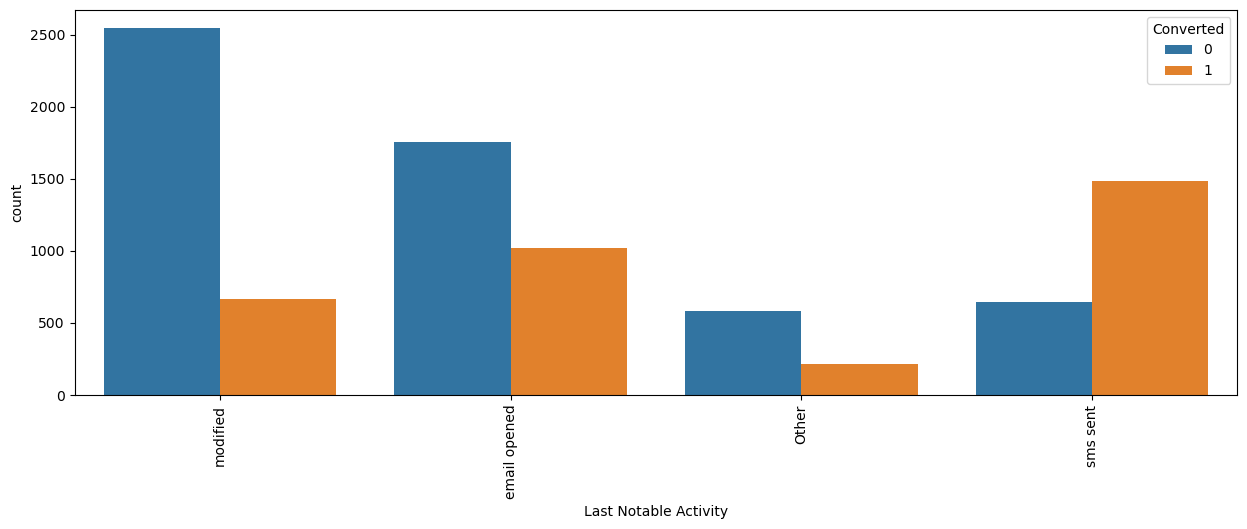

In [114]:
#plotting spread of  Last Notable Activity columnn 

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = 'Last Notable Activity', hue = 'Converted', data = df_leads)
xticks(rotation = 90)
plt.show()

36 Last Notable Activity - Keep

##### Clean Data Frame
First pass EDA and Feat Eng 

In [117]:
# Make a copy of the DataFrame
df_leads_eda = df_leads.copy()

In [118]:
#checking total rows and cols in dataset
df_leads_eda.shape

(8906, 24)

In [119]:
#data check
df_leads_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8906 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    8906 non-null   object  
 1   Lead Source                                    8877 non-null   object  
 2   Do Not Email                                   8906 non-null   int64   
 3   Do Not Call                                    8906 non-null   int64   
 4   Converted                                      8906 non-null   int64   
 5   TotalVisits                                    8906 non-null   float64 
 6   Total Time Spent on Website                    8906 non-null   int64   
 7   Page Views Per Visit                           8906 non-null   float64 
 8   Last Activity                                  8906 non-null   object  
 9   Country                                       

Saving the first phase cleanup EDA Data Frame to csv

In [121]:
# Save the DataFrame to an Excel file
df_leads_eda.to_csv("Resources/Leads_EDA.csv", index=False)  

---
---
---

#### Correlation 

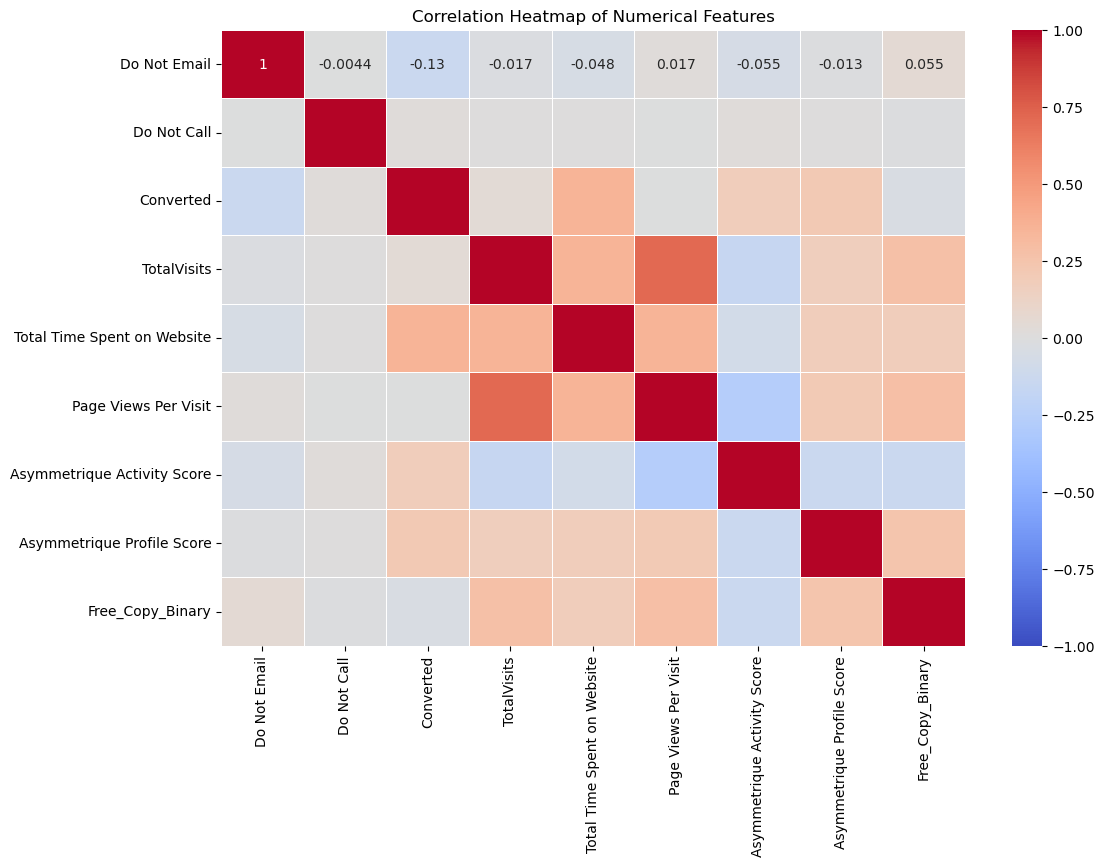

In [123]:
# Selecting only numerical features, including 'Converted'
numerical_features = df_leads_eda.select_dtypes(include=['int64', 'float64'])

# Calculating the correlation matrix
correlation_matrix = numerical_features.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

otal Time Spent on Website is the most promising predictor of conversion, while TotalVisits, Page Views Per Visit, and Marketing Engagement are less correlated with conversion.
Address highly correlated features by either removing one of them or combining them.
Perform feature transformation and engineering to explore more complex relationships between features.
Run a feature importance analysis to verify and refine your selected features before modeling.
Total Time Spent on Website has a positive correlation of 0.35 with Converted, which suggests that leads who spend more time on the website are more likely to convert. This feature is moderately correlated and is a good predictor for conversion.
Asymmetrique Activity Score and Asymmetrique Profile Score have correlations of 0.18 and 0.21, respectively, with Converted. These correlations are relatively weak but still positive, indicating some impact on conversion.
TotalVisits and Page Views Per Visit have very low correlations (0.044 and -0.0061) with Converted, suggesting that they might not have a significant effect on conversion. These features may require further transformation or even removal.
Marketing Engagement has a very low correlation (0.012) with Converted, suggesting it may have little predictive power.

### Correlation

In [124]:
# Selecting only the numerical columns
numerical_df = df_leads_eda.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numerical_df.corr()

# Displaying the correlation matrix
print(correlation_matrix)

                             Do Not Email  Do Not Call  Converted  \
Do Not Email                     1.000000    -0.004357  -0.134071   
Do Not Call                     -0.004357     1.000000   0.019168   
Converted                       -0.134071     0.019168   1.000000   
TotalVisits                     -0.016528     0.007231   0.045959   
Total Time Spent on Website     -0.047804     0.007278   0.351662   
Page Views Per Visit             0.016781    -0.005972  -0.005134   
Asymmetrique Activity Score     -0.055213     0.020901   0.178365   
Asymmetrique Profile Score      -0.013229     0.001930   0.216440   
Free_Copy_Binary                 0.054503    -0.010067  -0.034784   

                             TotalVisits  Total Time Spent on Website  \
Do Not Email                   -0.016528                    -0.047804   
Do Not Call                     0.007231                     0.007278   
Converted                       0.045959                     0.351662   
TotalVisits      

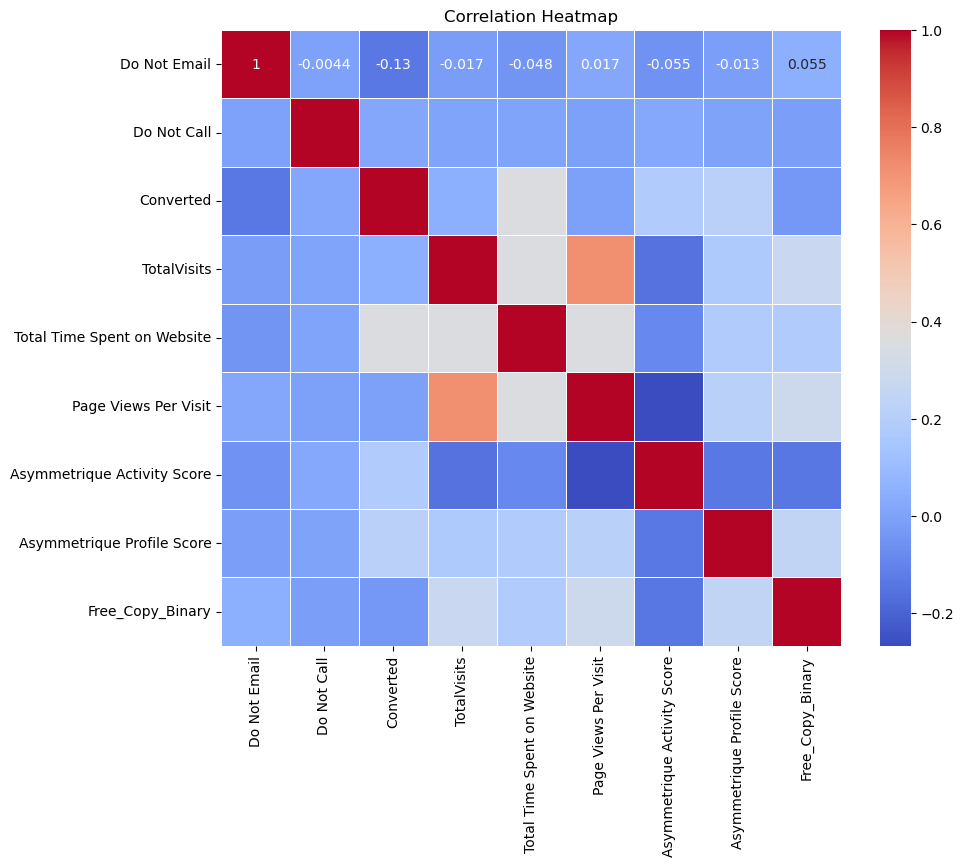

In [125]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Converted vs. Total Time Spent on Website: There is a moderate positive correlation (0.35) between "Converted" and "Total Time Spent on Website". This indicates that leads that spend more time on the website are more likely to convert.

Converted vs. TotalVisits: There is a very weak positive correlation (0.05) between "Converted" and "TotalVisits". This suggests that the number of total visits to the website does not strongly influence whether a lead converts or not.

Converted vs. Page Views Per Visit: There is an extremely weak negative correlation (-0.0049) between "Converted" and "Page Views Per Visit", implying that page views per visit do not have much impact on conversions.

Correlation among the features:

TotalVisits vs. Page Views Per Visit: There is a moderate positive correlation, which suggests that more total visits are generally associated with a higher number of page views per visit.
TotalVisits vs. Total Time Spent on Website: There is a moderate positive correlation, meaning that an increase in total visits is generally associated with more time spent on the website.
TotalVisits_sqrt is likely a transformed version of "TotalVisits", and it also shows moderate correlations with the other variables, which might have been created to normalize the distribution.
In summary, "Total Time Spent on Website" is the only variable with a somewhat meaningful correlation with conversion, indicating that investing efforts in increasing time spent on the website might lead to better conversion rates. Other variables, such as "TotalVisits" and "Page Views Per Visit," do not seem to have a strong effect on conversion.

(end of EDA)

----

In [126]:
# Check the DataFrame data types
df_leads_eda.dtypes

Lead Origin                                        object
Lead Source                                        object
Do Not Email                                        int64
Do Not Call                                         int64
Converted                                           int64
TotalVisits                                       float64
Total Time Spent on Website                         int64
Page Views Per Visit                              float64
Last Activity                                      object
Country                                            object
Specialization                                     object
What is your current occupation                    object
What matters most to you in choosing a course       int32
Tags                                               object
Lead Quality                                       object
City                                               object
Asymmetrique Activity Index                        object
Asymmetrique P

## Feature Engineering and Transformation

In [127]:
# Analyze the central tendency of columns
df_leads_eda.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What matters most to you in choosing a course,Asymmetrique Activity Score,Asymmetrique Profile Score,Free_Copy_Binary
count,8906.000000,8906.000000,8906.000000,8906.000000,8906.000000,8906.000000,8906.000000,4813.000000,4813.000000,8906.000000
mean,0.077925,0.000225,0.379407,3.111722,476.725578,2.232111,0.999775,14.350301,16.329940,0.310914
std,0.268069,0.014985,0.485267,2.877546,544.225990,1.837430,0.014985,1.121643,1.796717,0.462894
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.500000,11.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,1.000000,14.000000,15.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,239.000000,2.000000,1.000000,14.000000,16.000000,0.000000
75%,0.000000,0.000000,1.000000,4.000000,908.750000,3.000000,1.000000,15.000000,18.000000,1.000000
max,1.000000,1.000000,1.000000,17.000000,2272.000000,8.000000,1.000000,16.500000,20.000000,1.000000


### Numerical Scaling

In [130]:
# Selecting numerical columns for scaling
numerical_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

# Creating a copy of the dataset for scaling
df_scaled = df_leads_eda.copy()

# Applying StandardScaler
scaler = StandardScaler()
df_scaled[numerical_cols] = scaler.fit_transform(df_leads_eda[numerical_cols])

# Analyze the central tendency of columns
df_leads_eda.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What matters most to you in choosing a course,Asymmetrique Activity Score,Asymmetrique Profile Score,Free_Copy_Binary
count,8906.000000,8906.000000,8906.000000,8906.000000,8906.000000,8906.000000,8906.000000,4813.000000,4813.000000,8906.000000
mean,0.077925,0.000225,0.379407,3.111722,476.725578,2.232111,0.999775,14.350301,16.329940,0.310914
std,0.268069,0.014985,0.485267,2.877546,544.225990,1.837430,0.014985,1.121643,1.796717,0.462894
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.500000,11.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,1.000000,14.000000,15.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,239.000000,2.000000,1.000000,14.000000,16.000000,0.000000
75%,0.000000,0.000000,1.000000,4.000000,908.750000,3.000000,1.000000,15.000000,18.000000,1.000000
max,1.000000,1.000000,1.000000,17.000000,2272.000000,8.000000,1.000000,16.500000,20.000000,1.000000


### Categorical Encoding
- Use one-hot encoding for categorical features.

In [ ]:
# Applying One-Hot Encoding
df_leads = pd.get_dummies(df_leads, columns=['Lead Origin'], prefix='LeadOrigin', drop_first=True)

In [ ]:
#getting a list of categorical columns

cat_cols= df_leads.select_dtypes(include=['object']).columns
cat_cols

### Variable Transformation
- Apply log or square-root transformations for skewed data.

### Scaling
- Normalize or standardize numerical features.

### Dimensionality Reduction
- Use Principal Component Analysis (PCA) to reduce feature dimensions.

### Scale -> for numeric columns</br>
### OHE -> for categorical data

## Model Implementation

### Supervised Learning
- Logistic Regression, Decision Trees, Random Forest, Neural Networks.

### Model Evaluation
- Calculate baseline metric (accuracy, precision, recall) and performance on unseen data.


## Model Optimization

### Hyperparameter Tuning
- Grid search, random search.

### Regularization
- Optional L2 regularization.

### Visualizations
- Learning curves, feature importance, showing iterative improvements.

## Presentation

### Clear Objectives
- Communicate the problem statement and solution.

### Model Performance
- Use visualizations (learning curves, comparison of models).

### Interactivity (Optional)
- If meaningful, incorporate interactive visualizations.

---


other stuff might use

country

In [ ]:
# Calculate the percentage of rows with "India" in the Country column
india_percentage = (df_leads['Country'].value_counts()['india'] / df_leads['Country'].count()) * 100

# Print the percentage
print(f"'india' within Country column: {india_percentage:.2f}%")

Because >96% of the data is mapped as india, making Country data heavily skewed and not required for the modeling process, will drop this column from the DF. 

In [ ]:
# dropping country column
df_leads.drop('Country',axis=1,inplace =True)